In [81]:
library(readxl)
library(ggplot2)
library("FactoMineR")
library(tidyverse) #data Manipulation
library(cluster) #Clustering algorithms
library(factoextra)#Clustering Algorithms & Visualization
library(gridExtra)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
library("np") #npreg: you may need to install it
library(PerformanceAnalytics)
library(psych)
#install.packages('fmsb')
library(fmsb) #For Spider Plots
#install.packages('countrycode')
library(countrycode)
#install.packages(c('hrbrthemes','viridis'))
#library(hrbrthemes)
#library(viridis)
#install.packages('GGally')
library(GGally)
library(dplyr)
library(ggmap)
library(leaflet)
library(htmltools)
library(dplyr) #getMap()
library(rgeos)
#install.packages('rworldmap')
library(rworldmap) #joinCountryData2Map
library(grid)
library(tidyr)
#install.packages(c("cowplot", "googleway", "ggplot2", "ggrepel", "ggspatial", "sf", "rnaturalearth", "rnaturalearthdata"))
library("sf")
library("rnaturalearth")
library("rnaturalearthdata")
#install.packages('writexl')
library(writexl)

In [82]:
df.wa.fa <- read_excel("../../results/df-wa-fa.xlsx",sheet=1)
dfsimple <- read_excel("../../results/dfsimple.xlsx",sheet=1)
df <- df.wa.fa[,c(2:6)]

df <- df %>% 
  rename(
    well.time = PA1,
    spring.tmor = PA3,
    phom = PA2,
    yard.ptap = PA4,
    outside.ws = PA5
      
    )

head(df,7)

well.time,spring.tmor,phom,yard.ptap,outside.ws
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-6.704758,-2.984986,-12.85618,-11.886626,-59.27068
-42.888074,-30.984337,20.82525,-53.165726,-94.86436
-2.512602,3.686798,2.72616,-4.392143,-52.01720
-63.607862,-51.504509,41.32225,-78.394369,-136.31722
-35.994685,-25.322488,10.25590,-32.187582,-81.70158
-38.401709,-38.626072,-60.62093,-48.329163,-90.90471
-6.113861,-7.871829,-17.71719,-18.806414,-75.00816


   well.time        spring.tmor           phom           yard.ptap      
 Min.   :-63.608   Min.   :-51.505   Min.   :-60.621   Min.   :-82.951  
 1st Qu.:-33.566   1st Qu.:-25.291   1st Qu.:-12.987   1st Qu.:-32.790  
 Median :-14.245   Median :-11.954   Median : -1.785   Median :-20.013  
 Mean   :-20.767   Mean   :-14.029   Mean   : -1.570   Mean   :-25.689  
 3rd Qu.: -5.665   3rd Qu.: -4.777   3rd Qu.: 10.806   3rd Qu.:-10.839  
 Max.   :  9.395   Max.   : 25.598   Max.   : 41.701   Max.   :  7.324  
   outside.ws      
 Min.   :-141.390  
 1st Qu.: -90.318  
 Median : -76.542  
 Mean   : -76.370  
 3rd Qu.: -63.651  
 Max.   :   6.785  

well.time,spring.tmor,phom,yard.ptap,outside.ws
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-6.704758,-2.984986,-12.85618,-11.886626,-59.27068
-42.888074,-30.984337,20.82525,-53.165726,-94.86436
-2.512602,3.686798,2.72616,-4.392143,-52.01720
-63.607862,-51.504509,41.32225,-78.394369,-136.31722
-35.994685,-25.322488,10.25590,-32.187582,-81.70158
-38.401709,-38.626072,-60.62093,-48.329163,-90.90471


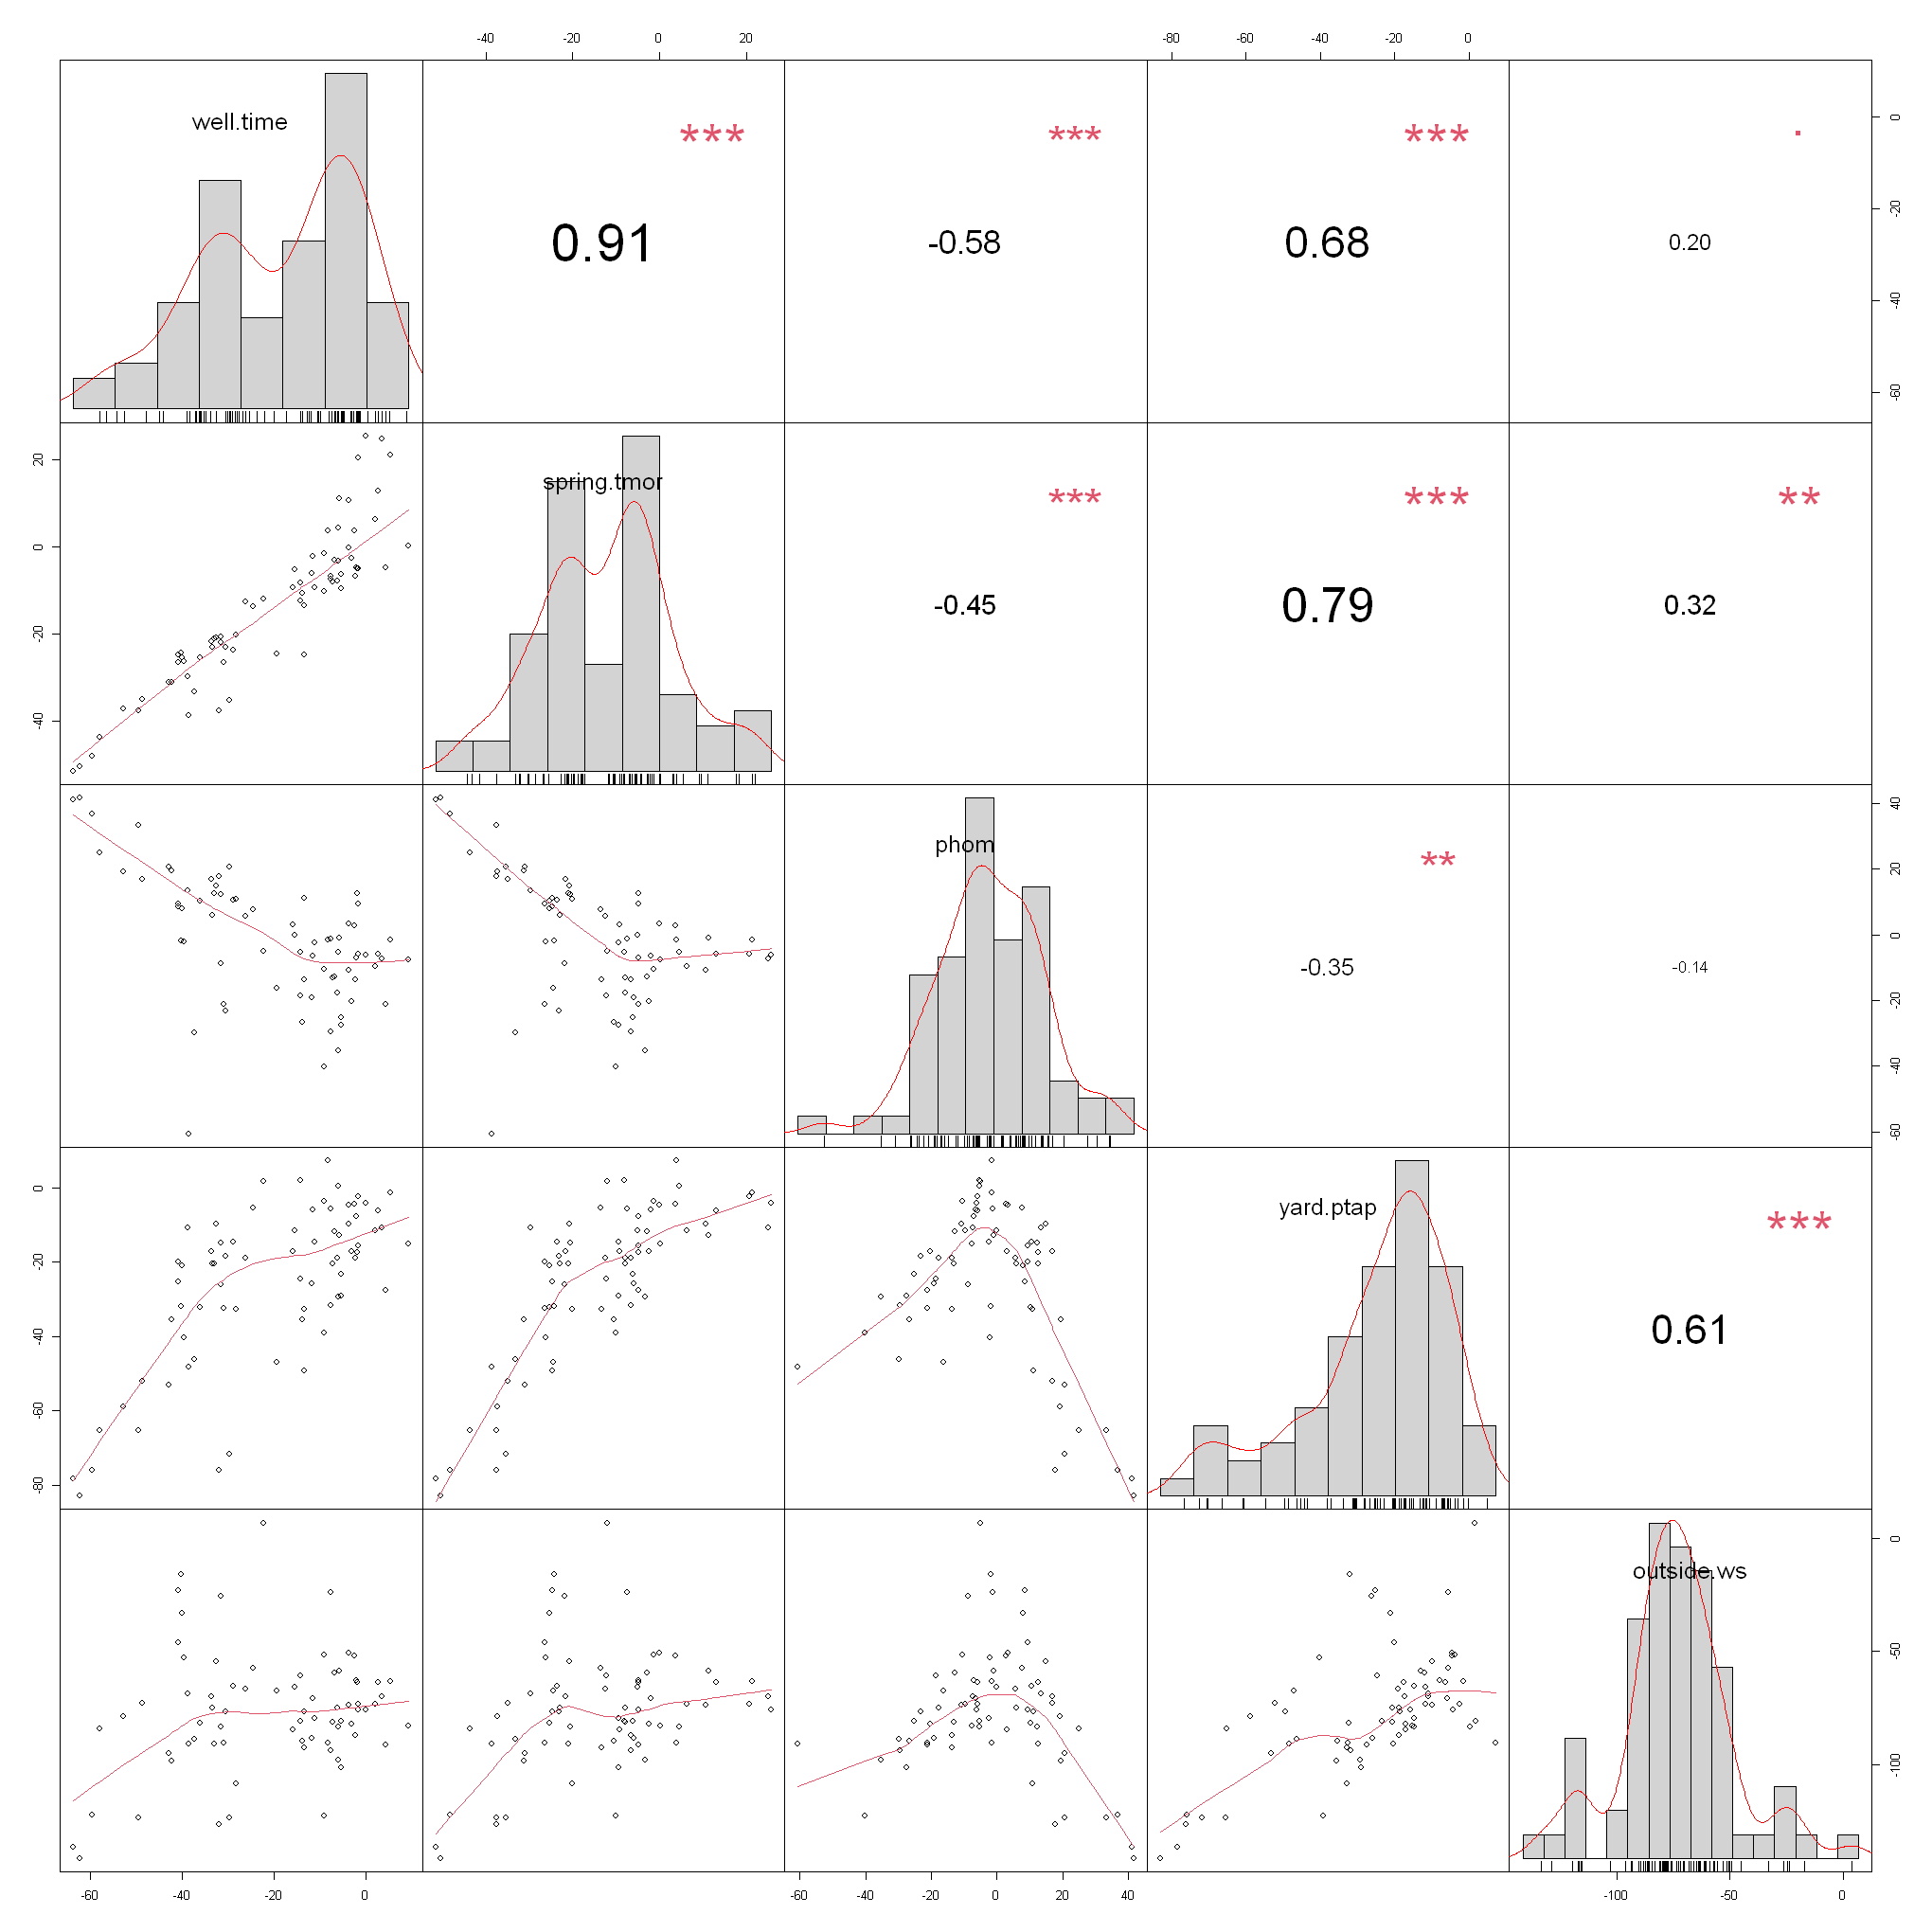

In [83]:
summary(df)
head(df)
chart.Correlation(df, histogram=TRUE, pch=19 , tl.cex = .7 )

In [84]:
# Create data: Water Accessibility Aggregate

df.wa.aggregate <- aggregate(df, list(clusters=dfsimple$clusters), mean)
df.wa.avg <- df.wa.aggregate[,1:6]
df.wa.avg

clusters,well.time,spring.tmor,phom,yard.ptap,outside.ws
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-4.335078,2.193795,-5.899745,-9.913764,-71.78450
2,-36.873773,-25.618786,13.952056,-28.873672,-78.14998
3,-49.401285,-43.385979,32.000880,-75.083253,-128.76794
4,-17.841501,-17.081094,-23.376056,-34.815094,-86.32754
5,-31.817231,-20.288259,1.332664,-18.314523,-22.96776


In [85]:
# Dark2 code: ## [1] "#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A", "#66A61E", "#E6AB02" ,"#A6761D"
## [8] "#666666"

[1]  72.87462  95.68577 166.05591  99.18195  48.10057

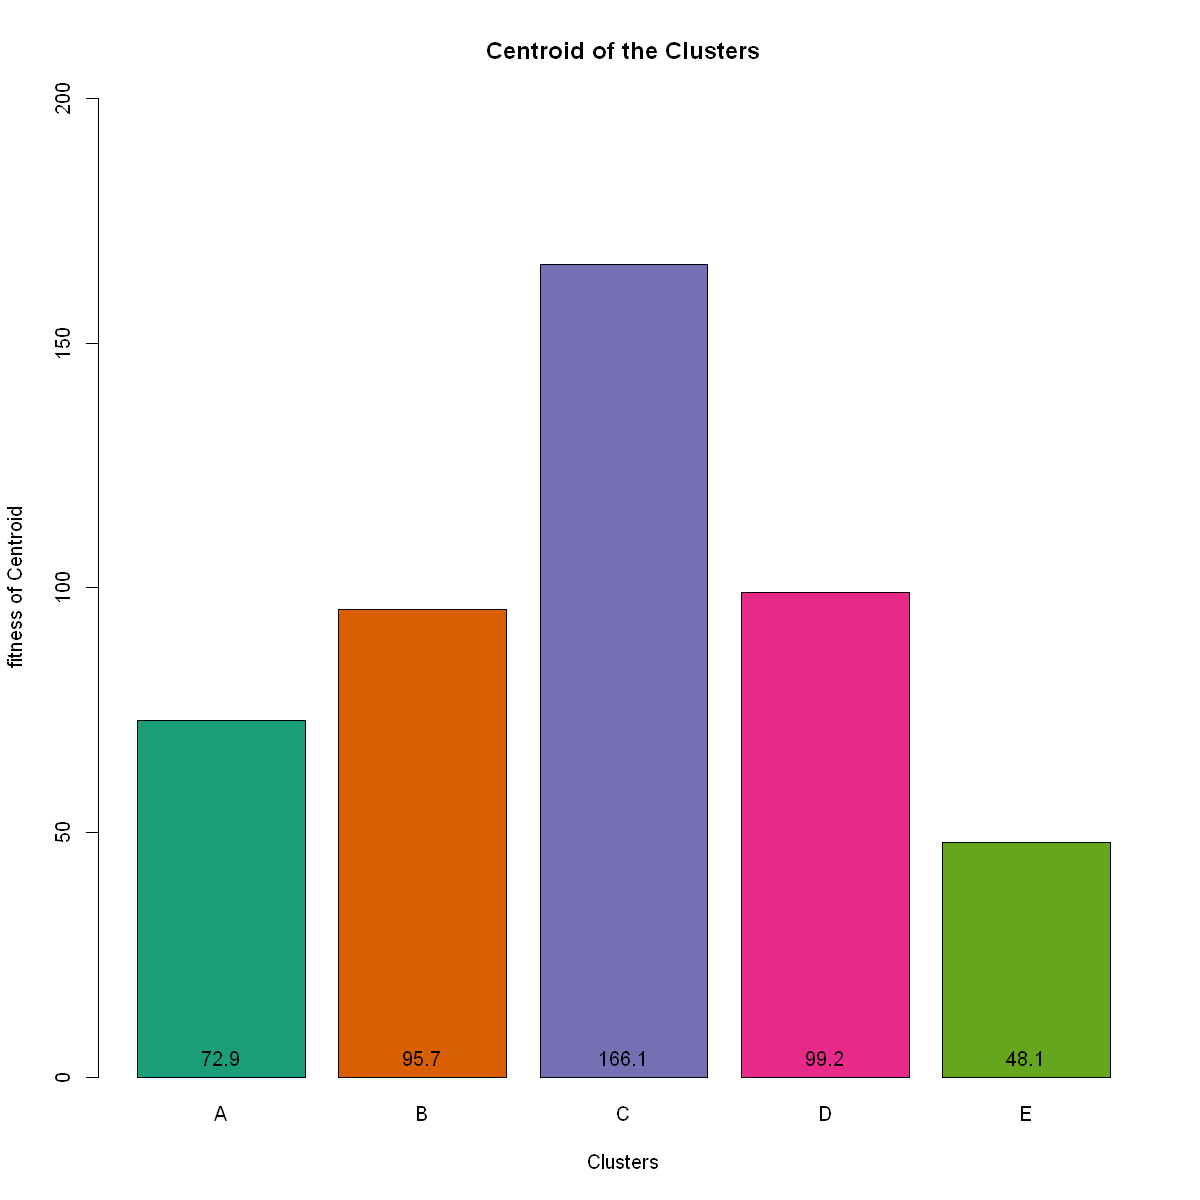

ERROR: Error in x^2: non-numeric argument to binary operator


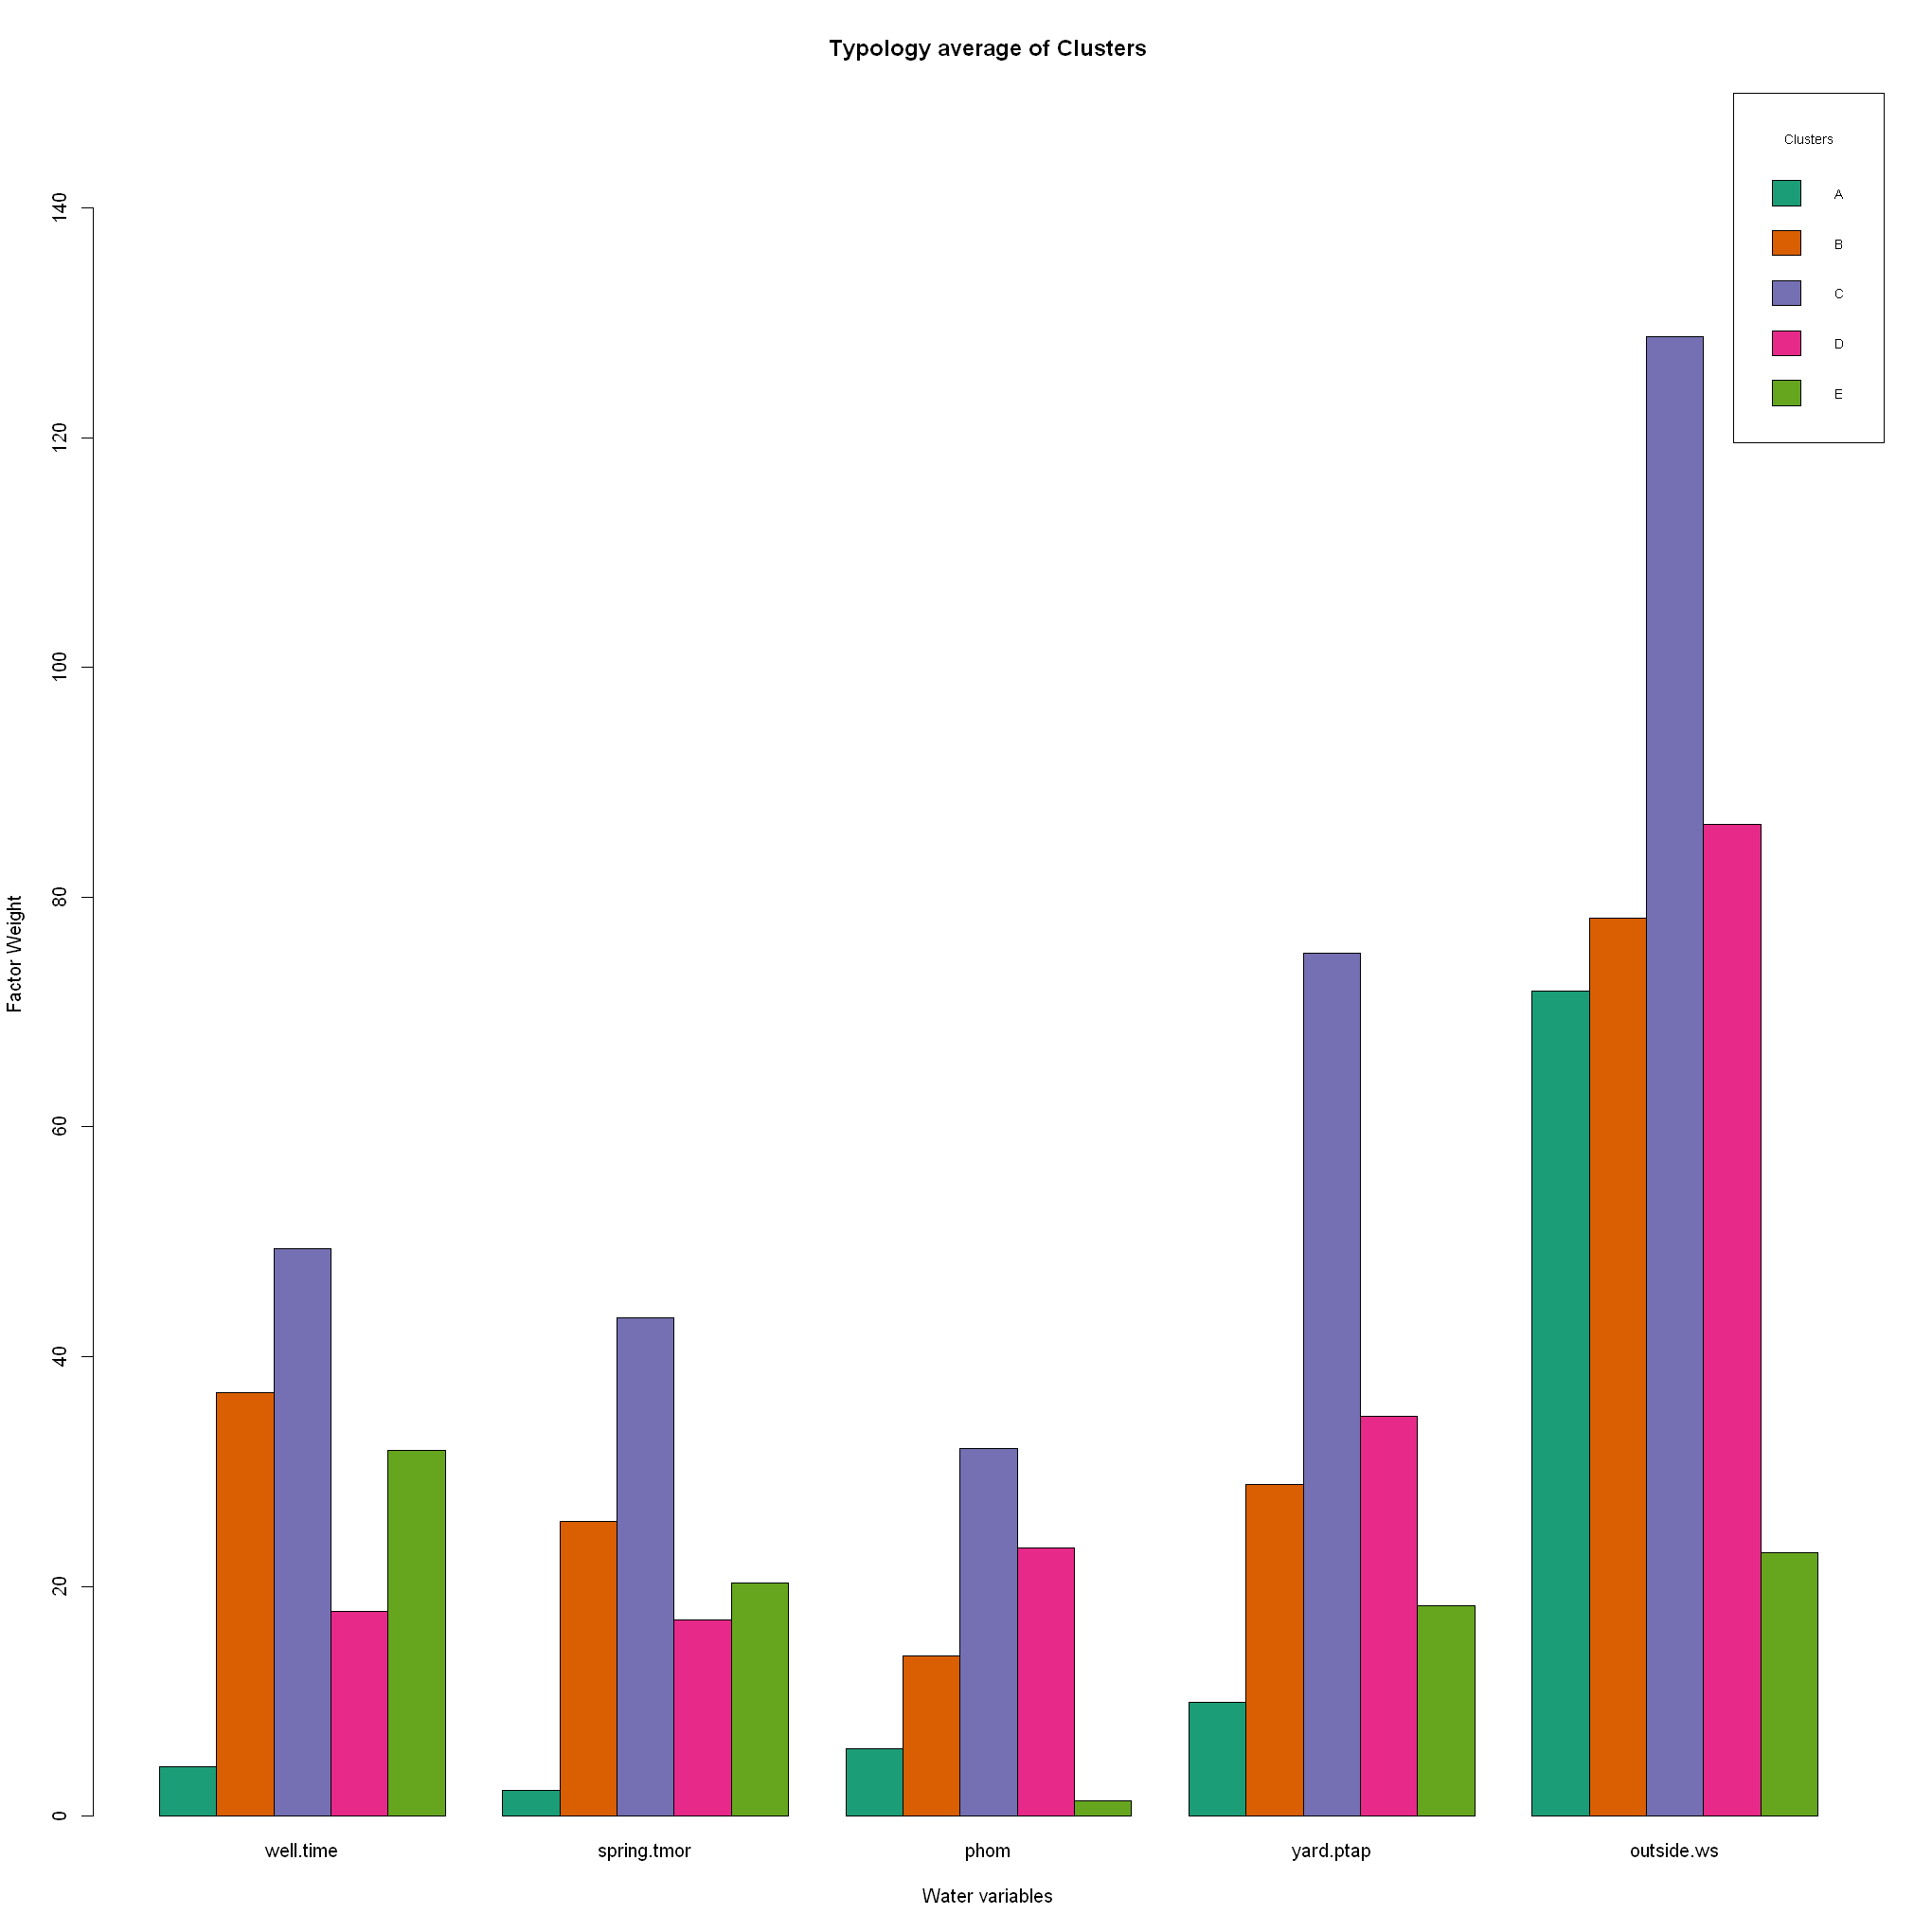

In [138]:
centroid <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the centroid of the cluster
centroid
                  
options(repr.plot.width=10, repr.plot.height=10)                  
old.par <- par(mar = c(0, 0, 0, 0))
par(old.par)

bp <- barplot(centroid,
        main = "Centroid of the Clusters", xlab = "Clusters", ylab = "fitness of Centroid",
        col = c("#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A", "#66A61E"),
        ylim = c(0, 200), names.arg = c("A", "B", "C","D","E"))
text(bp, 0, round(centroid, 1),cex=1,pos=3)
options(repr.plot.width=17, repr.plot.height=17)
barplot(as.matrix(abs(df.wa.avg[,c(2:6)])),
        beside = TRUE,
        main = "Typology average of Clusters", xlab = "Water variables", ylab = "Factor Weight",
        col = c("#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A", "#66A61E"),
        legend = c("A", "B", "C","D","E"), 
        args.legend = list(title = "Clusters", x = "topright", cex = .7), ylim = c(0, 150))
                  


centroiddf.wa <- apply(df, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster
head(centroiddf.wa)


,well.time,spring.tmor,phom,yard.ptap,outside.ws
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,200.000000,200.000000,200.000000,200.000000,200.00000
2,0.000000,0.000000,0.000000,0.000000,0.00000
3,4.335078,2.193795,5.899745,9.913764,71.78450
4,36.873773,25.618786,13.952056,28.873672,78.14998
5,49.401285,43.385979,32.000880,75.083253,128.76794
6,17.841501,17.081094,23.376056,34.815094,86.32754
7,31.817231,20.288259,1.332664,18.314523,22.96776


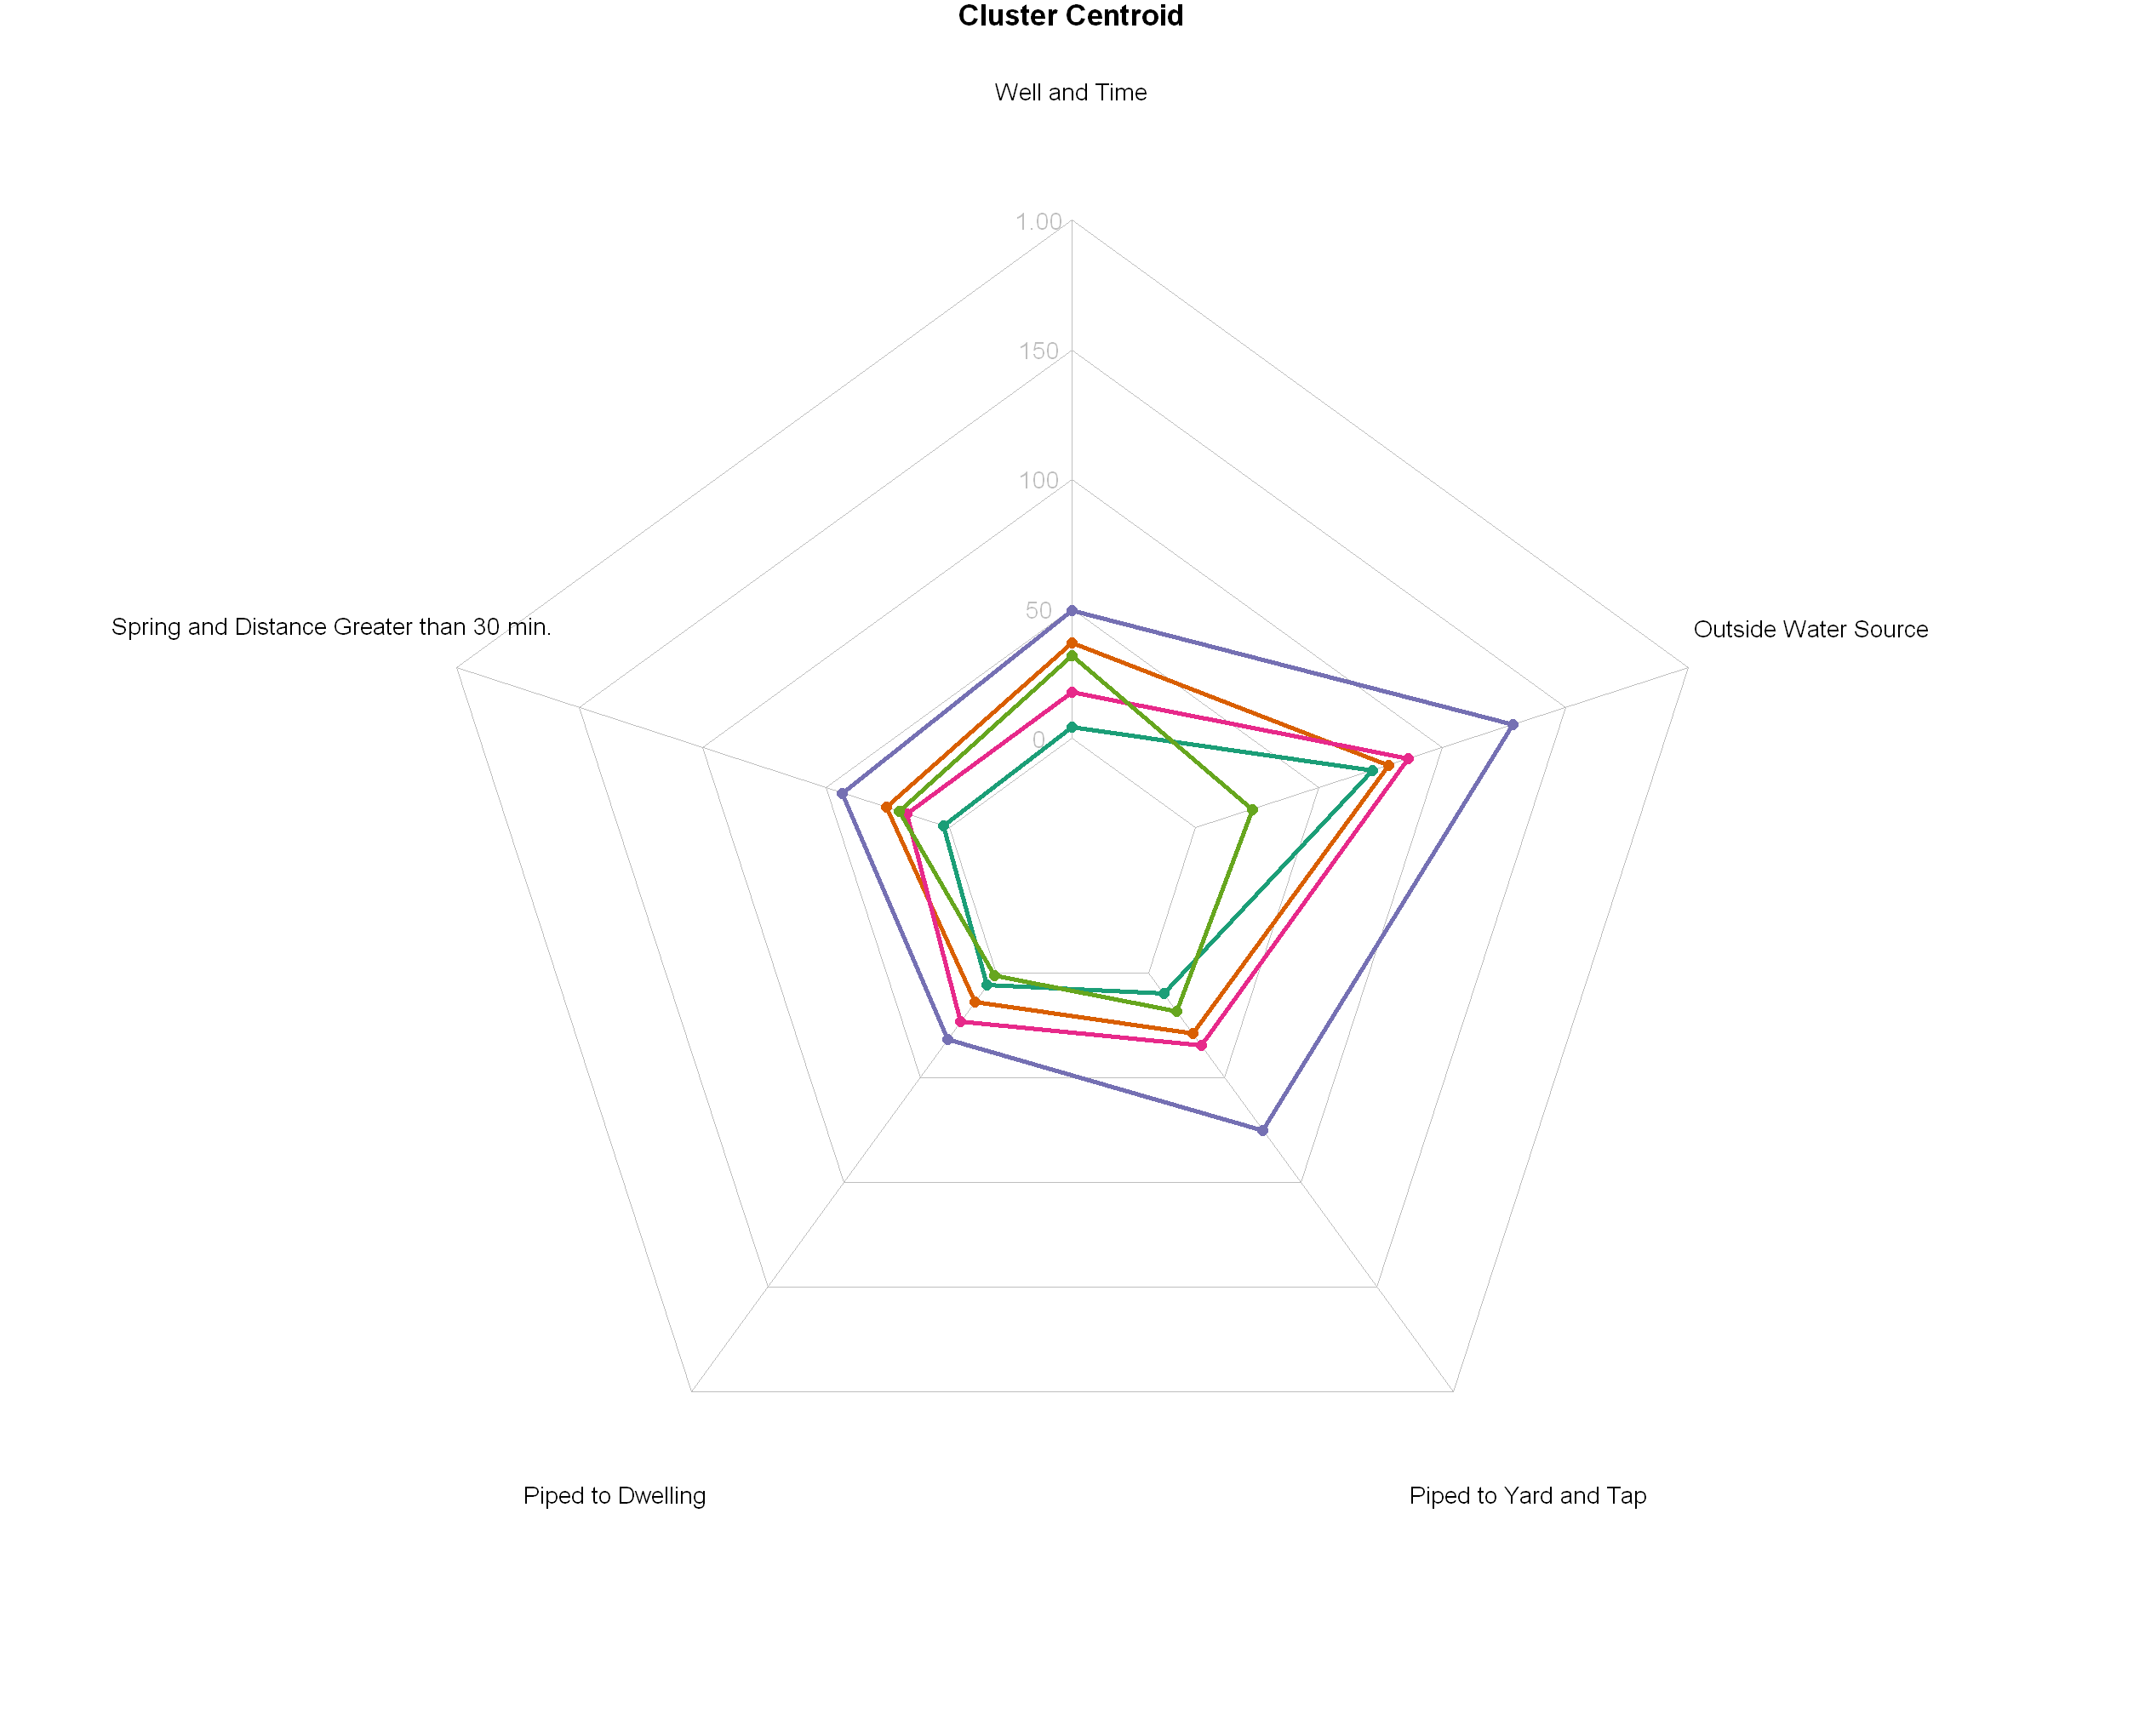

In [136]:
data.spider <- rbind(rep(200,100) , rep(0,10) , abs(df.wa.avg[,c(2:6)]))

head(data.spider,7)
colnames(data.spider) <- c(
                            
    "Well and Time",
"Spring and Distance Greater than 30 min.",
"Piped to Dwelling",
"Piped to Yard and Tap",
"Outside Water Source")                       
options(repr.plot.width=21, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1.4)

# The default radar chart for First Cluster
r.c. <- radarchart(data.spider,
           #custom polygon
           pcol= c("#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A", "#66A61E") ,
           plwd=4 , plty=1,
           #custom the grid
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels= seq(0,150,50), cglwd=0.8, axistype = 4,
           title = 'Cluster Centroid',
           vlcex=1,
           calcex = 1 ,
                   
           )

# Box Plot of Water Accessibility Variables (Violin Plots)

well.time,spring.tmor,phom,yard.ptap,outside.ws
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-4.335078,2.193795,-5.899745,-9.913764,-71.78450
-36.873773,-25.618786,13.952056,-28.873672,-78.14998
-49.401285,-43.385979,32.000880,-75.083253,-128.76794
-17.841501,-17.081094,-23.376056,-34.815094,-86.32754
-31.817231,-20.288259,1.332664,-18.314523,-22.96776


[1] "factor" "factor" "factor" "factor" "factor"

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"position_dodge requires non-overlapping x intervals"


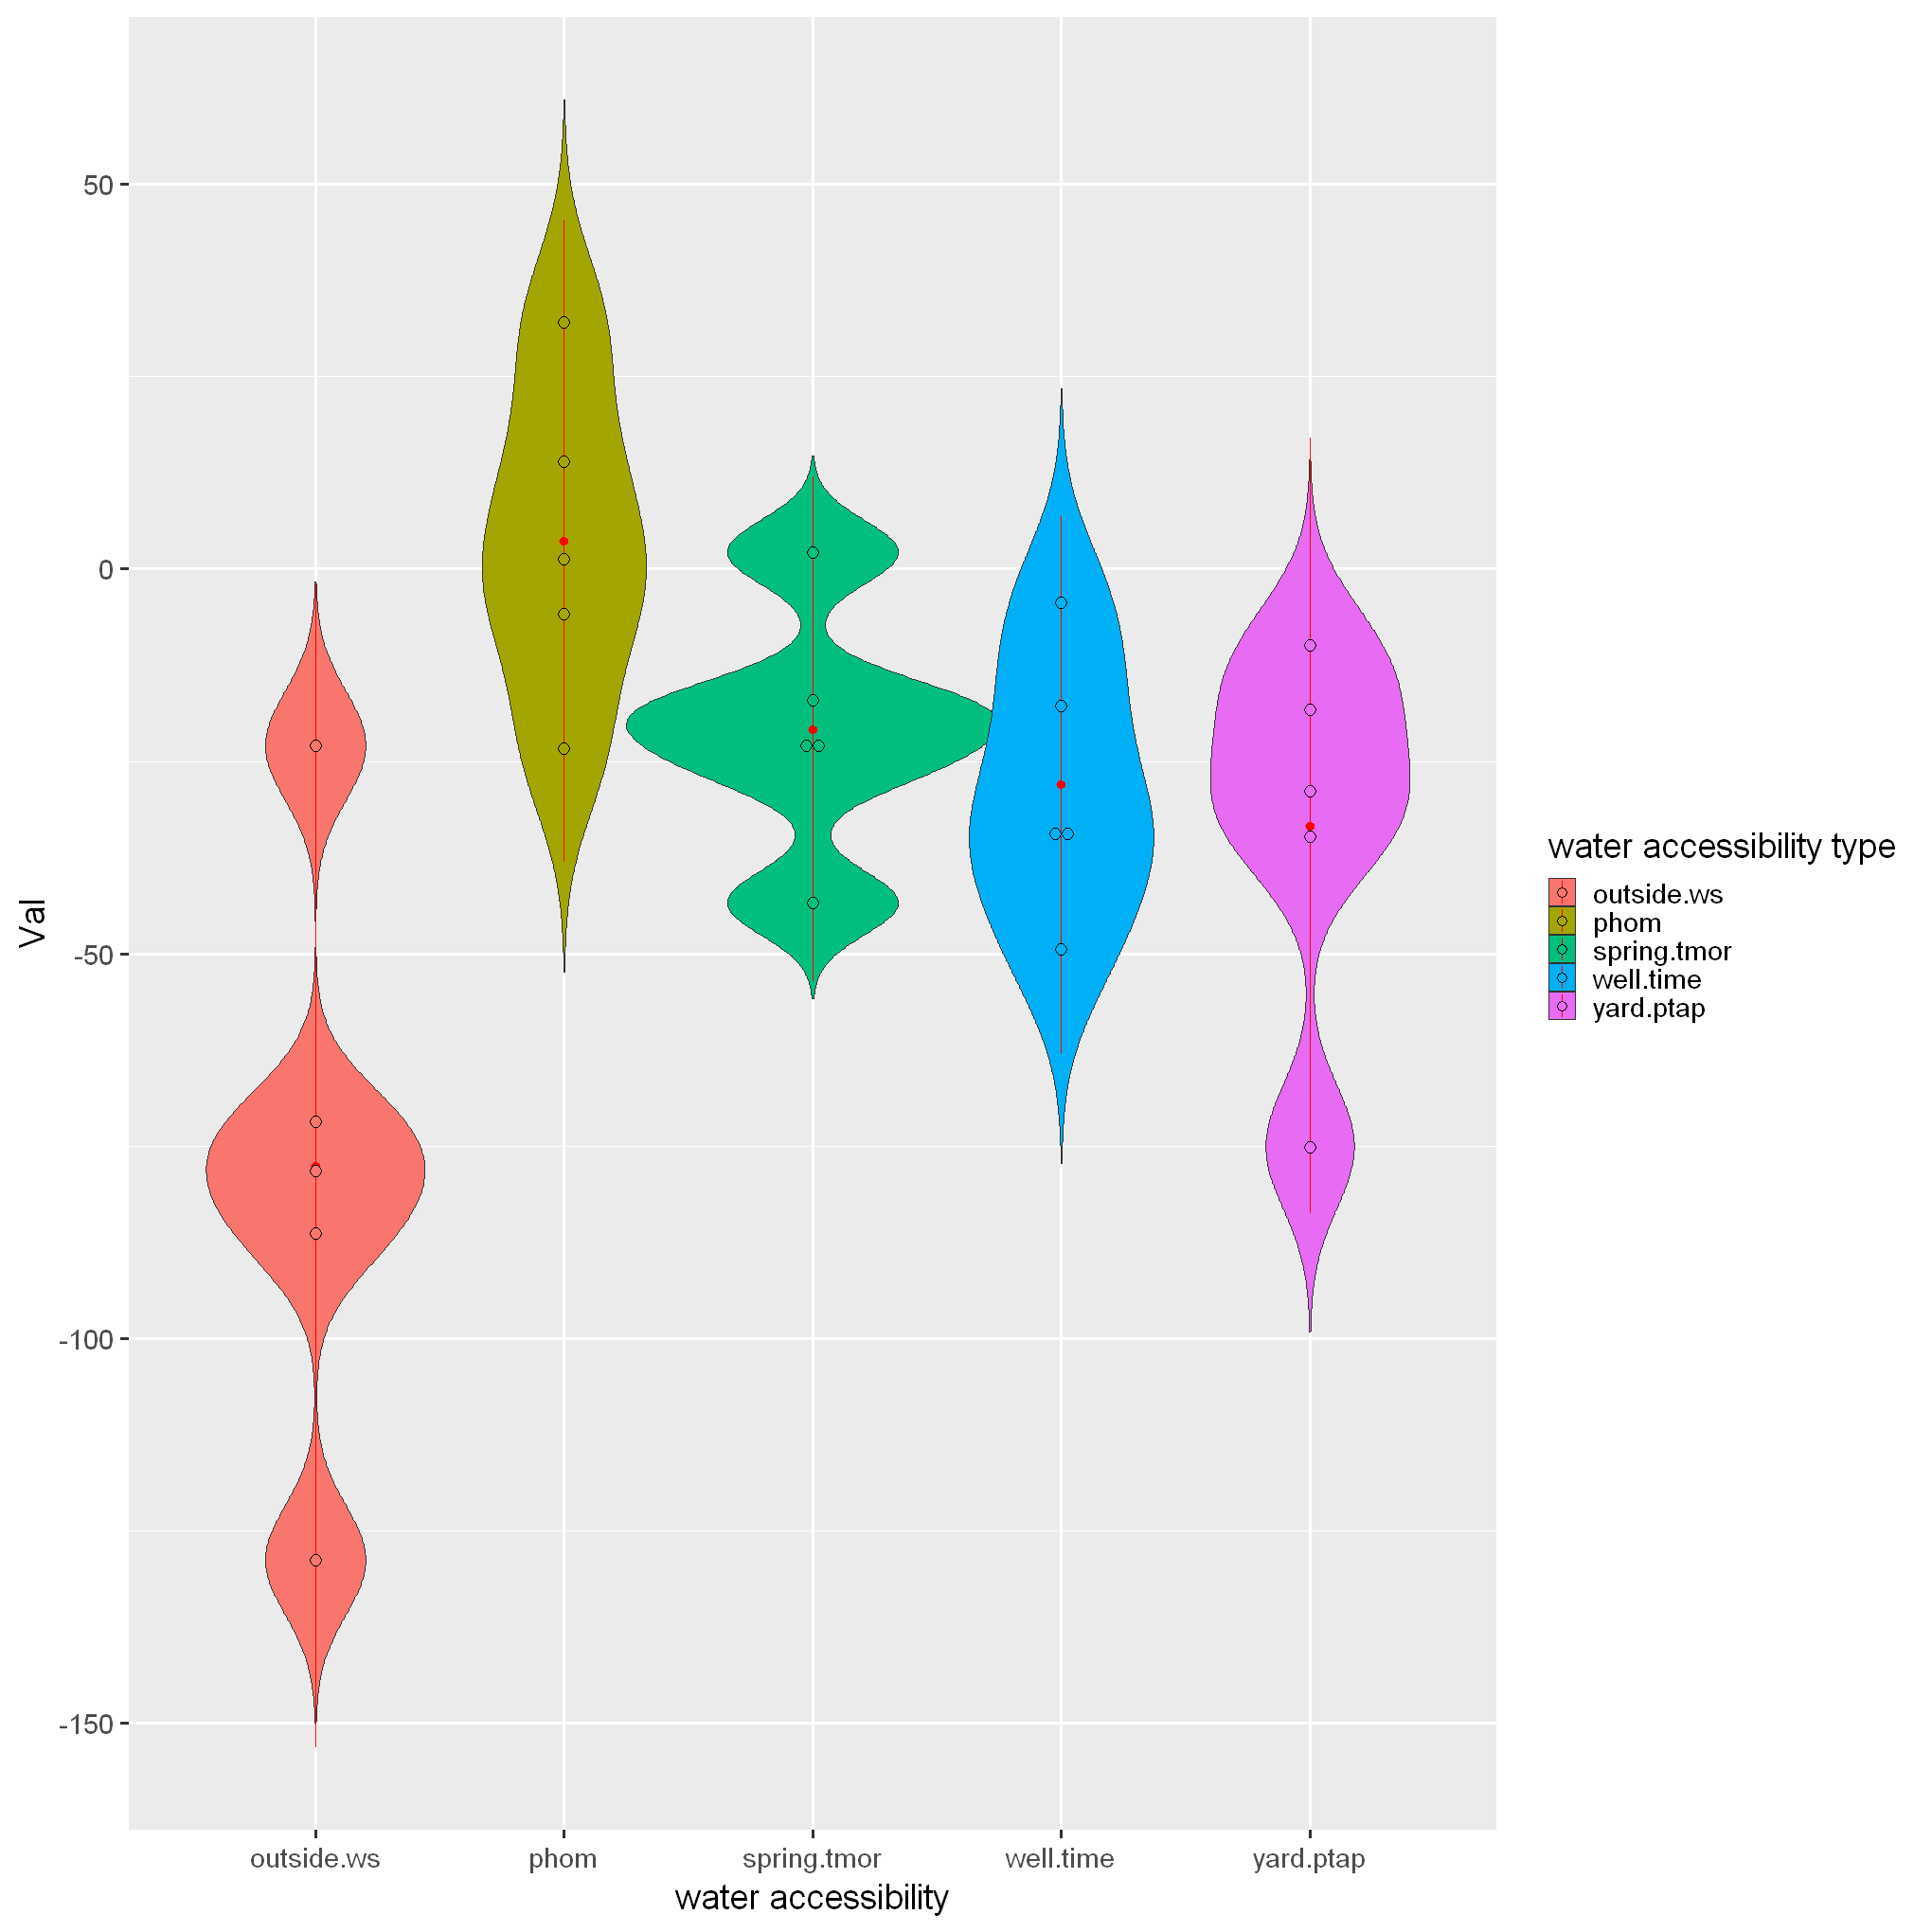

In [88]:
df.wa.aggregate <- aggregate(df, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:6]
df.wa.aggregate
rownames(df.wa.aggregate) <- c('A','B','C','D','E')

data_wa_one <- df.wa.aggregate[  ,1:5]

df.wa.aggregate <- as.factor(df.wa.aggregate[,])
sapply(df.wa.aggregate, class)


options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=5)

p <- data_wa_one %>% 
    gather(key="MesureType", value="Val") %>%
    ggplot( aes(x=MesureType, y=Val, fill=MesureType)) +
    geom_violin(trim=FALSE, width=1.5, size=.3) + 
    
    stat_summary(fun.data=mean_sdl, geom="pointrange", color="red") + 
    scale_color_brewer(palette="Dark2") +
    xlab('water accessibility') +
    geom_dotplot(binaxis='y', stackdir='center', dotsize=.3) +
    guides(fill =guide_legend("water accessibility type"))
p <- p + theme_grey(base_size = 22)
p 




# Facet Graphs 

well.time,spring.tmor,phom,yard.ptap,outside.ws
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-6.7047581,-2.984986,-12.856181,-11.886626,-59.27068
-42.8880740,-30.984337,20.825249,-53.165726,-94.86436
-2.5126016,3.686798,2.726160,-4.392143,-52.01720
-63.6078620,-51.504509,41.322249,-78.394369,-136.31722
-35.9946854,-25.322488,10.255904,-32.187582,-81.70158
-38.4017090,-38.626072,-60.620932,-48.329163,-90.90471
-6.1138611,-7.871829,-17.717189,-18.806414,-75.00816
-38.7762300,-29.719688,13.568659,-10.764121,-68.66245
-5.3500448,-9.524463,-27.545963,-29.008114,-101.16248



 1  2  3  4  5 
28 16  6 16  7 

clusters,well.time,spring.tmor,phom,yard.ptap,outside.ws
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-4.335078,2.193795,-5.899745,-9.913764,-71.78450
2,-36.873773,-25.618786,13.952056,-28.873672,-78.14998
3,-49.401285,-43.385979,32.000880,-75.083253,-128.76794
4,-17.841501,-17.081094,-23.376056,-34.815094,-86.32754
5,-31.817231,-20.288259,1.332664,-18.314523,-22.96776


clusters   well.time spring.tmor        phom   yard.ptap  outside.ws 
   "factor"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric"

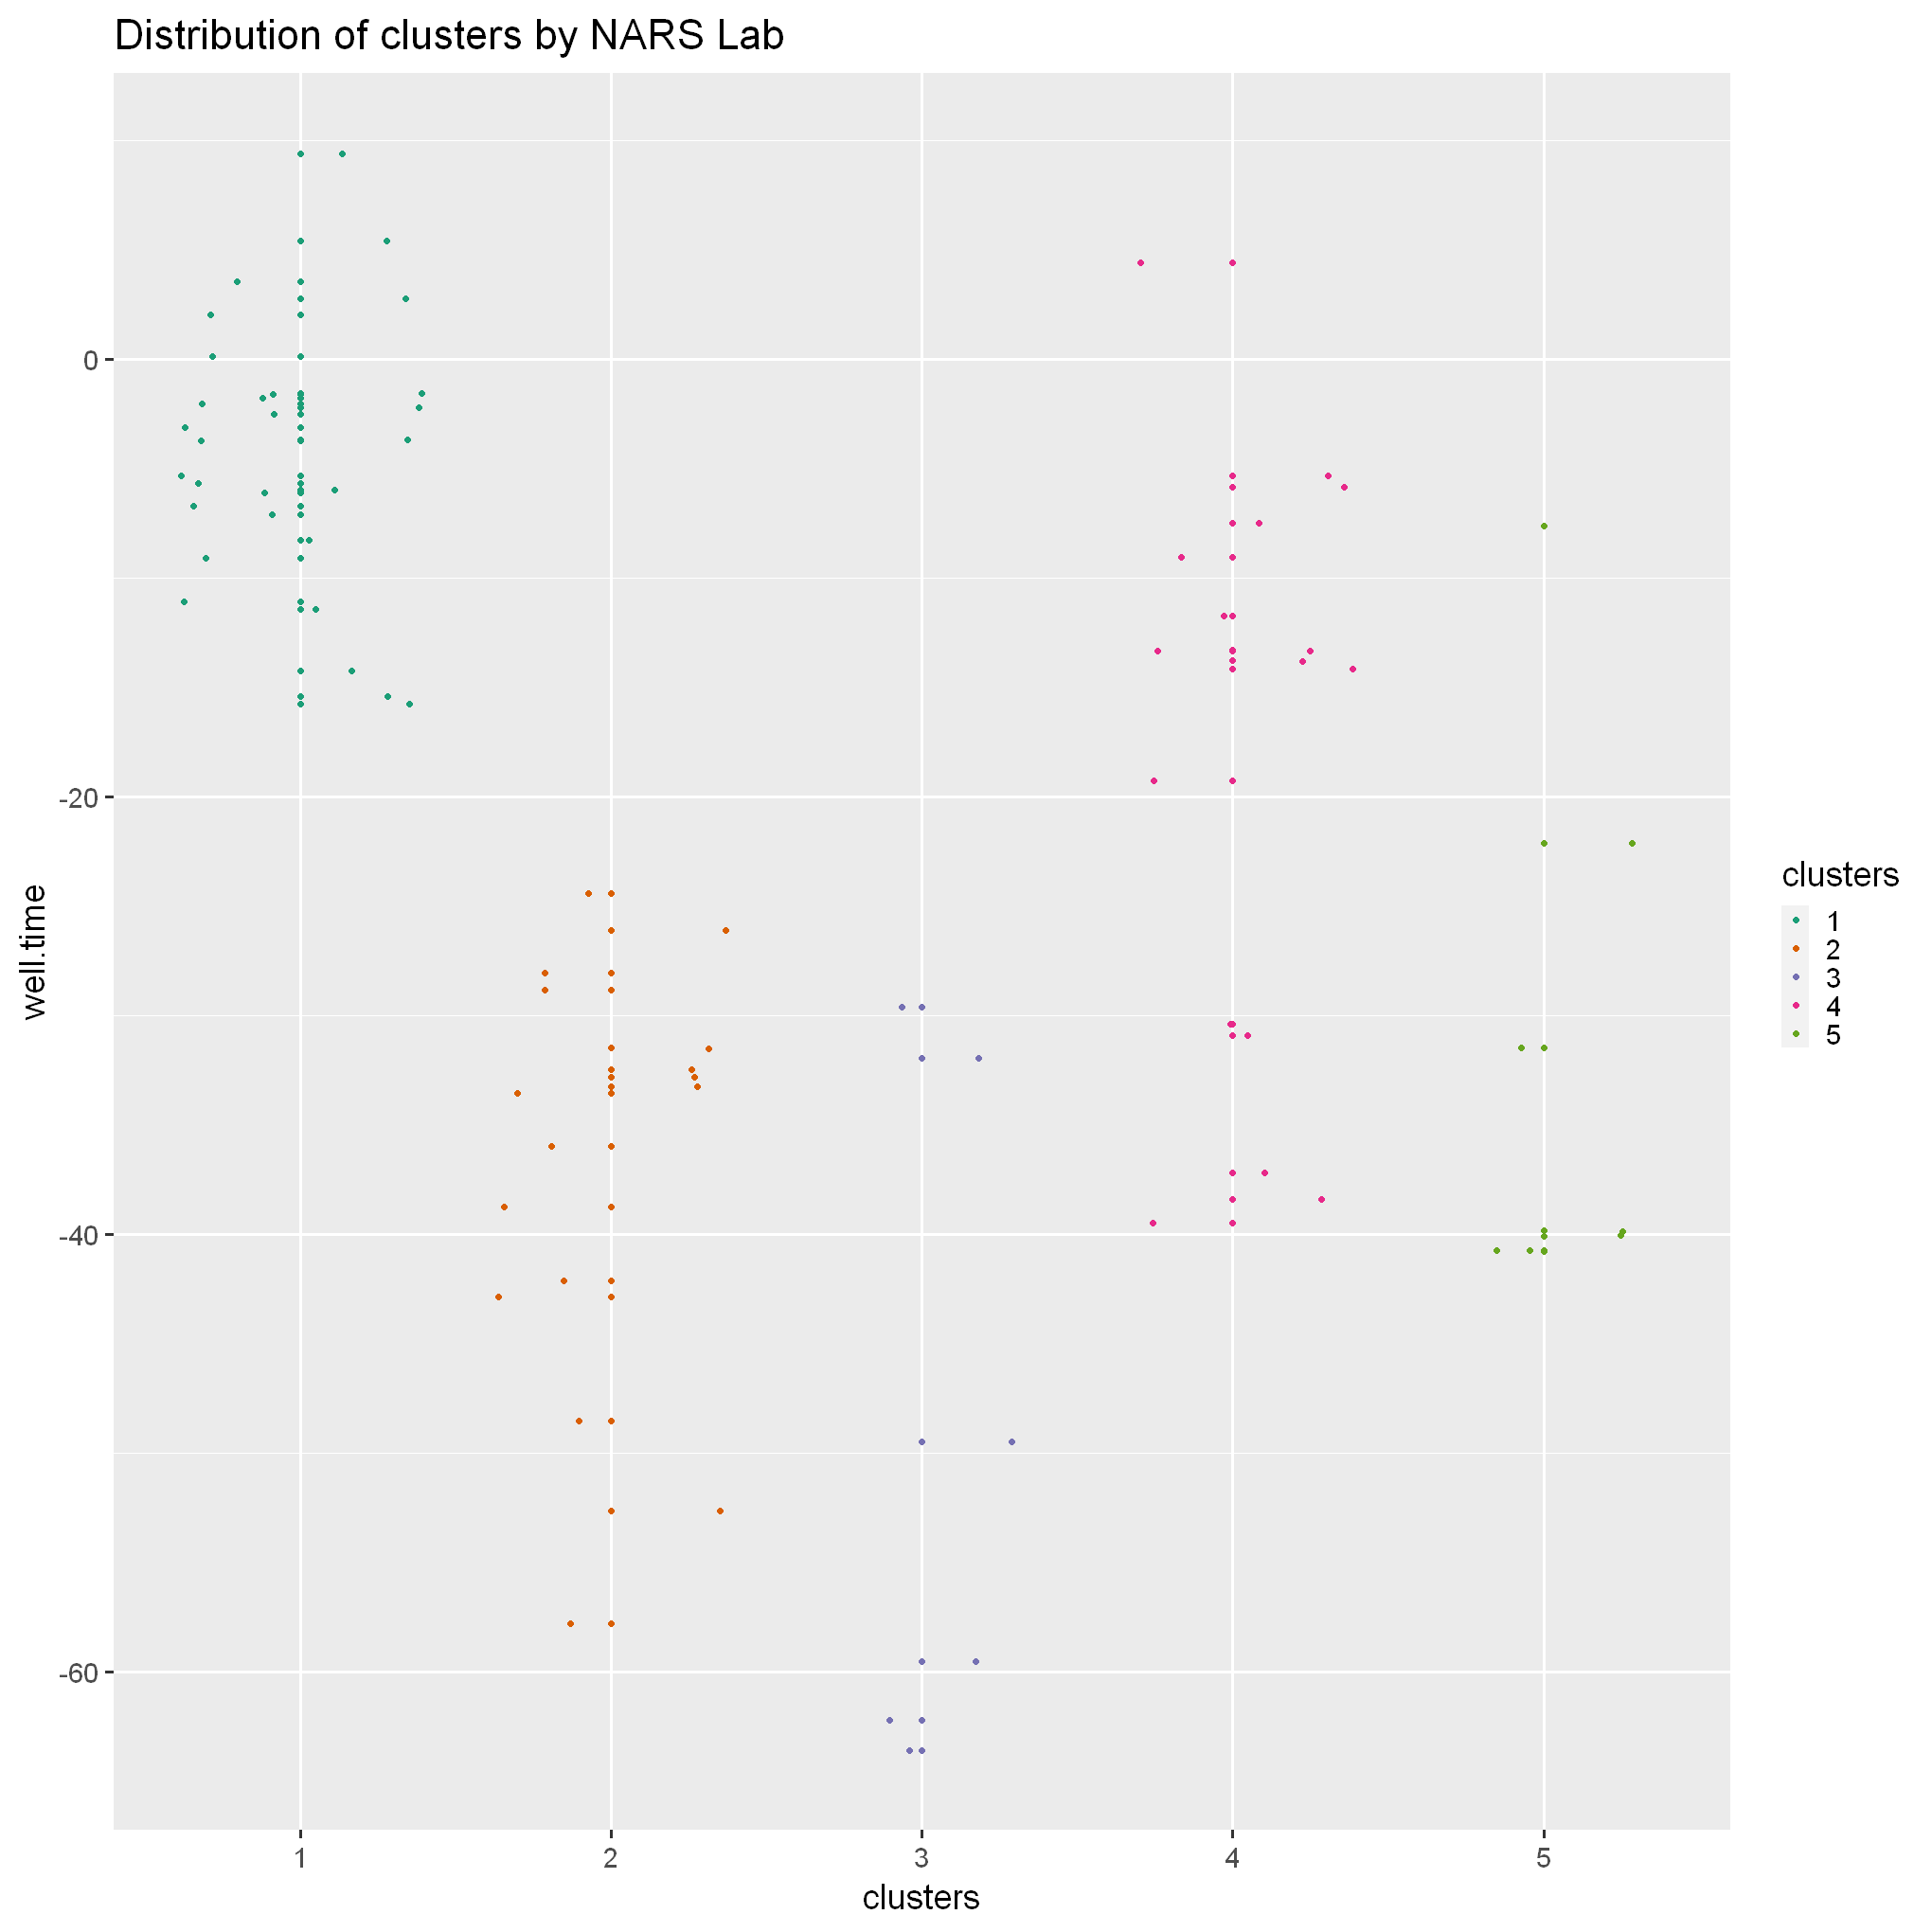

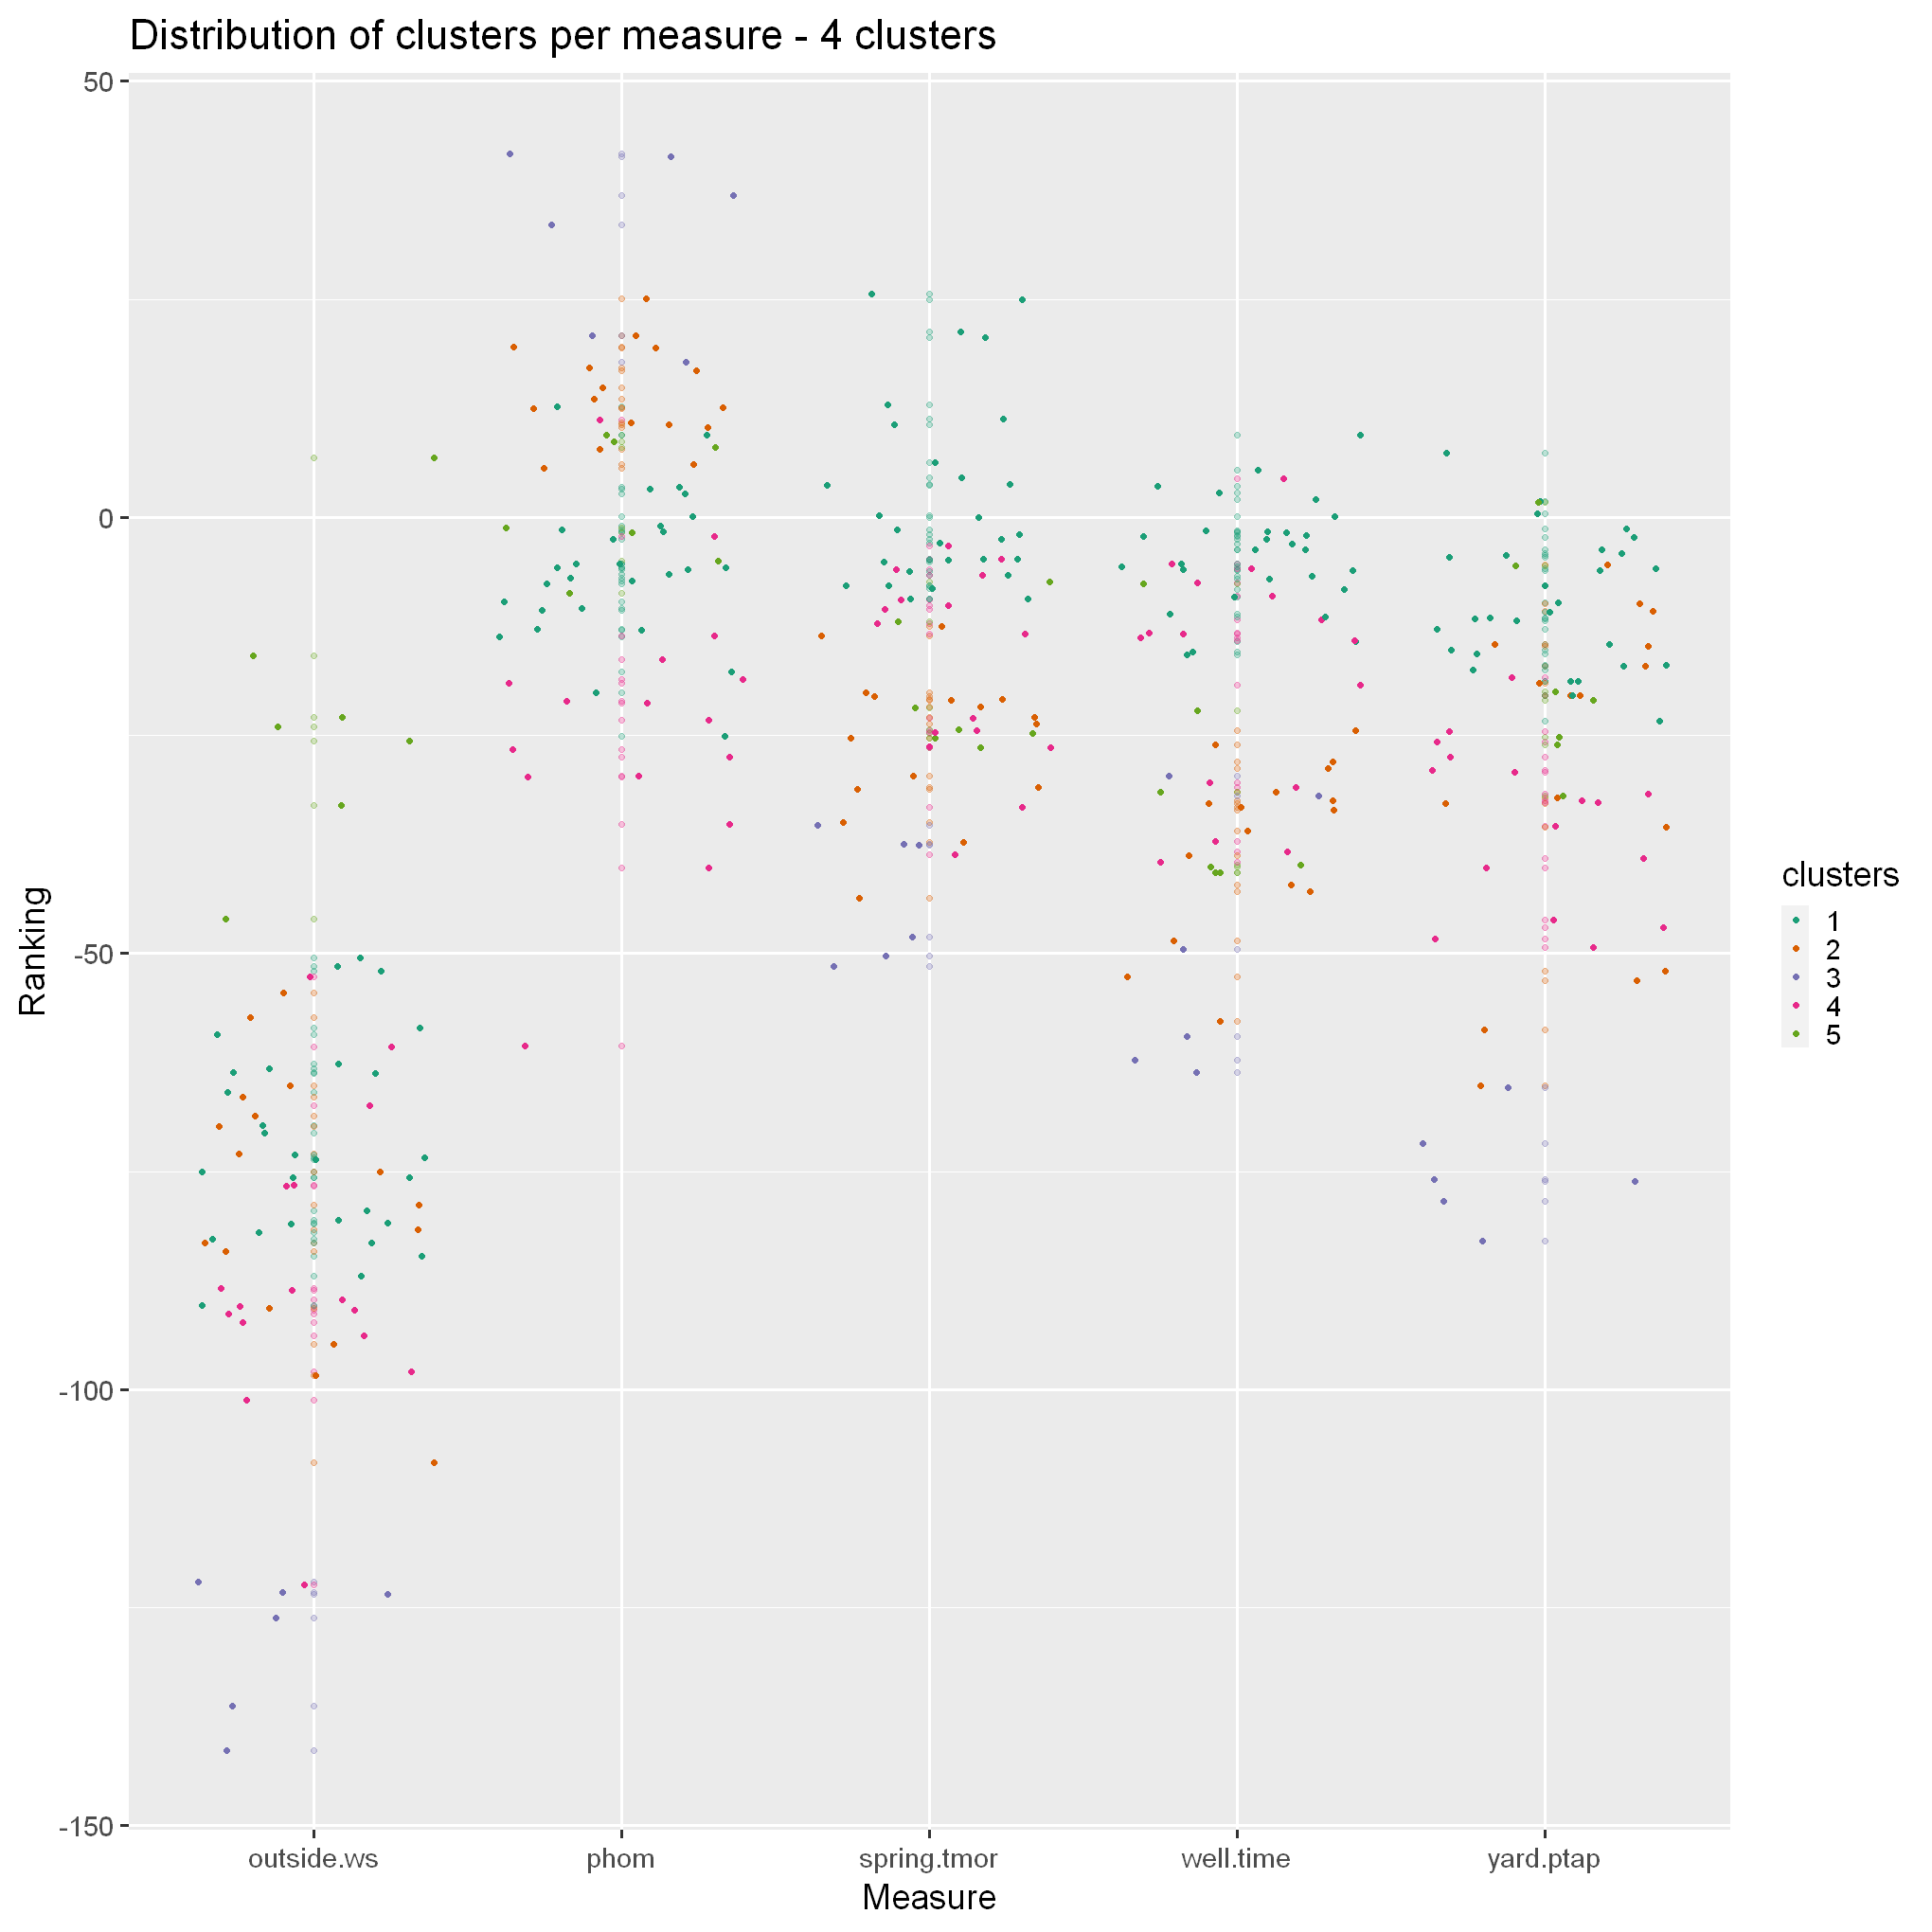

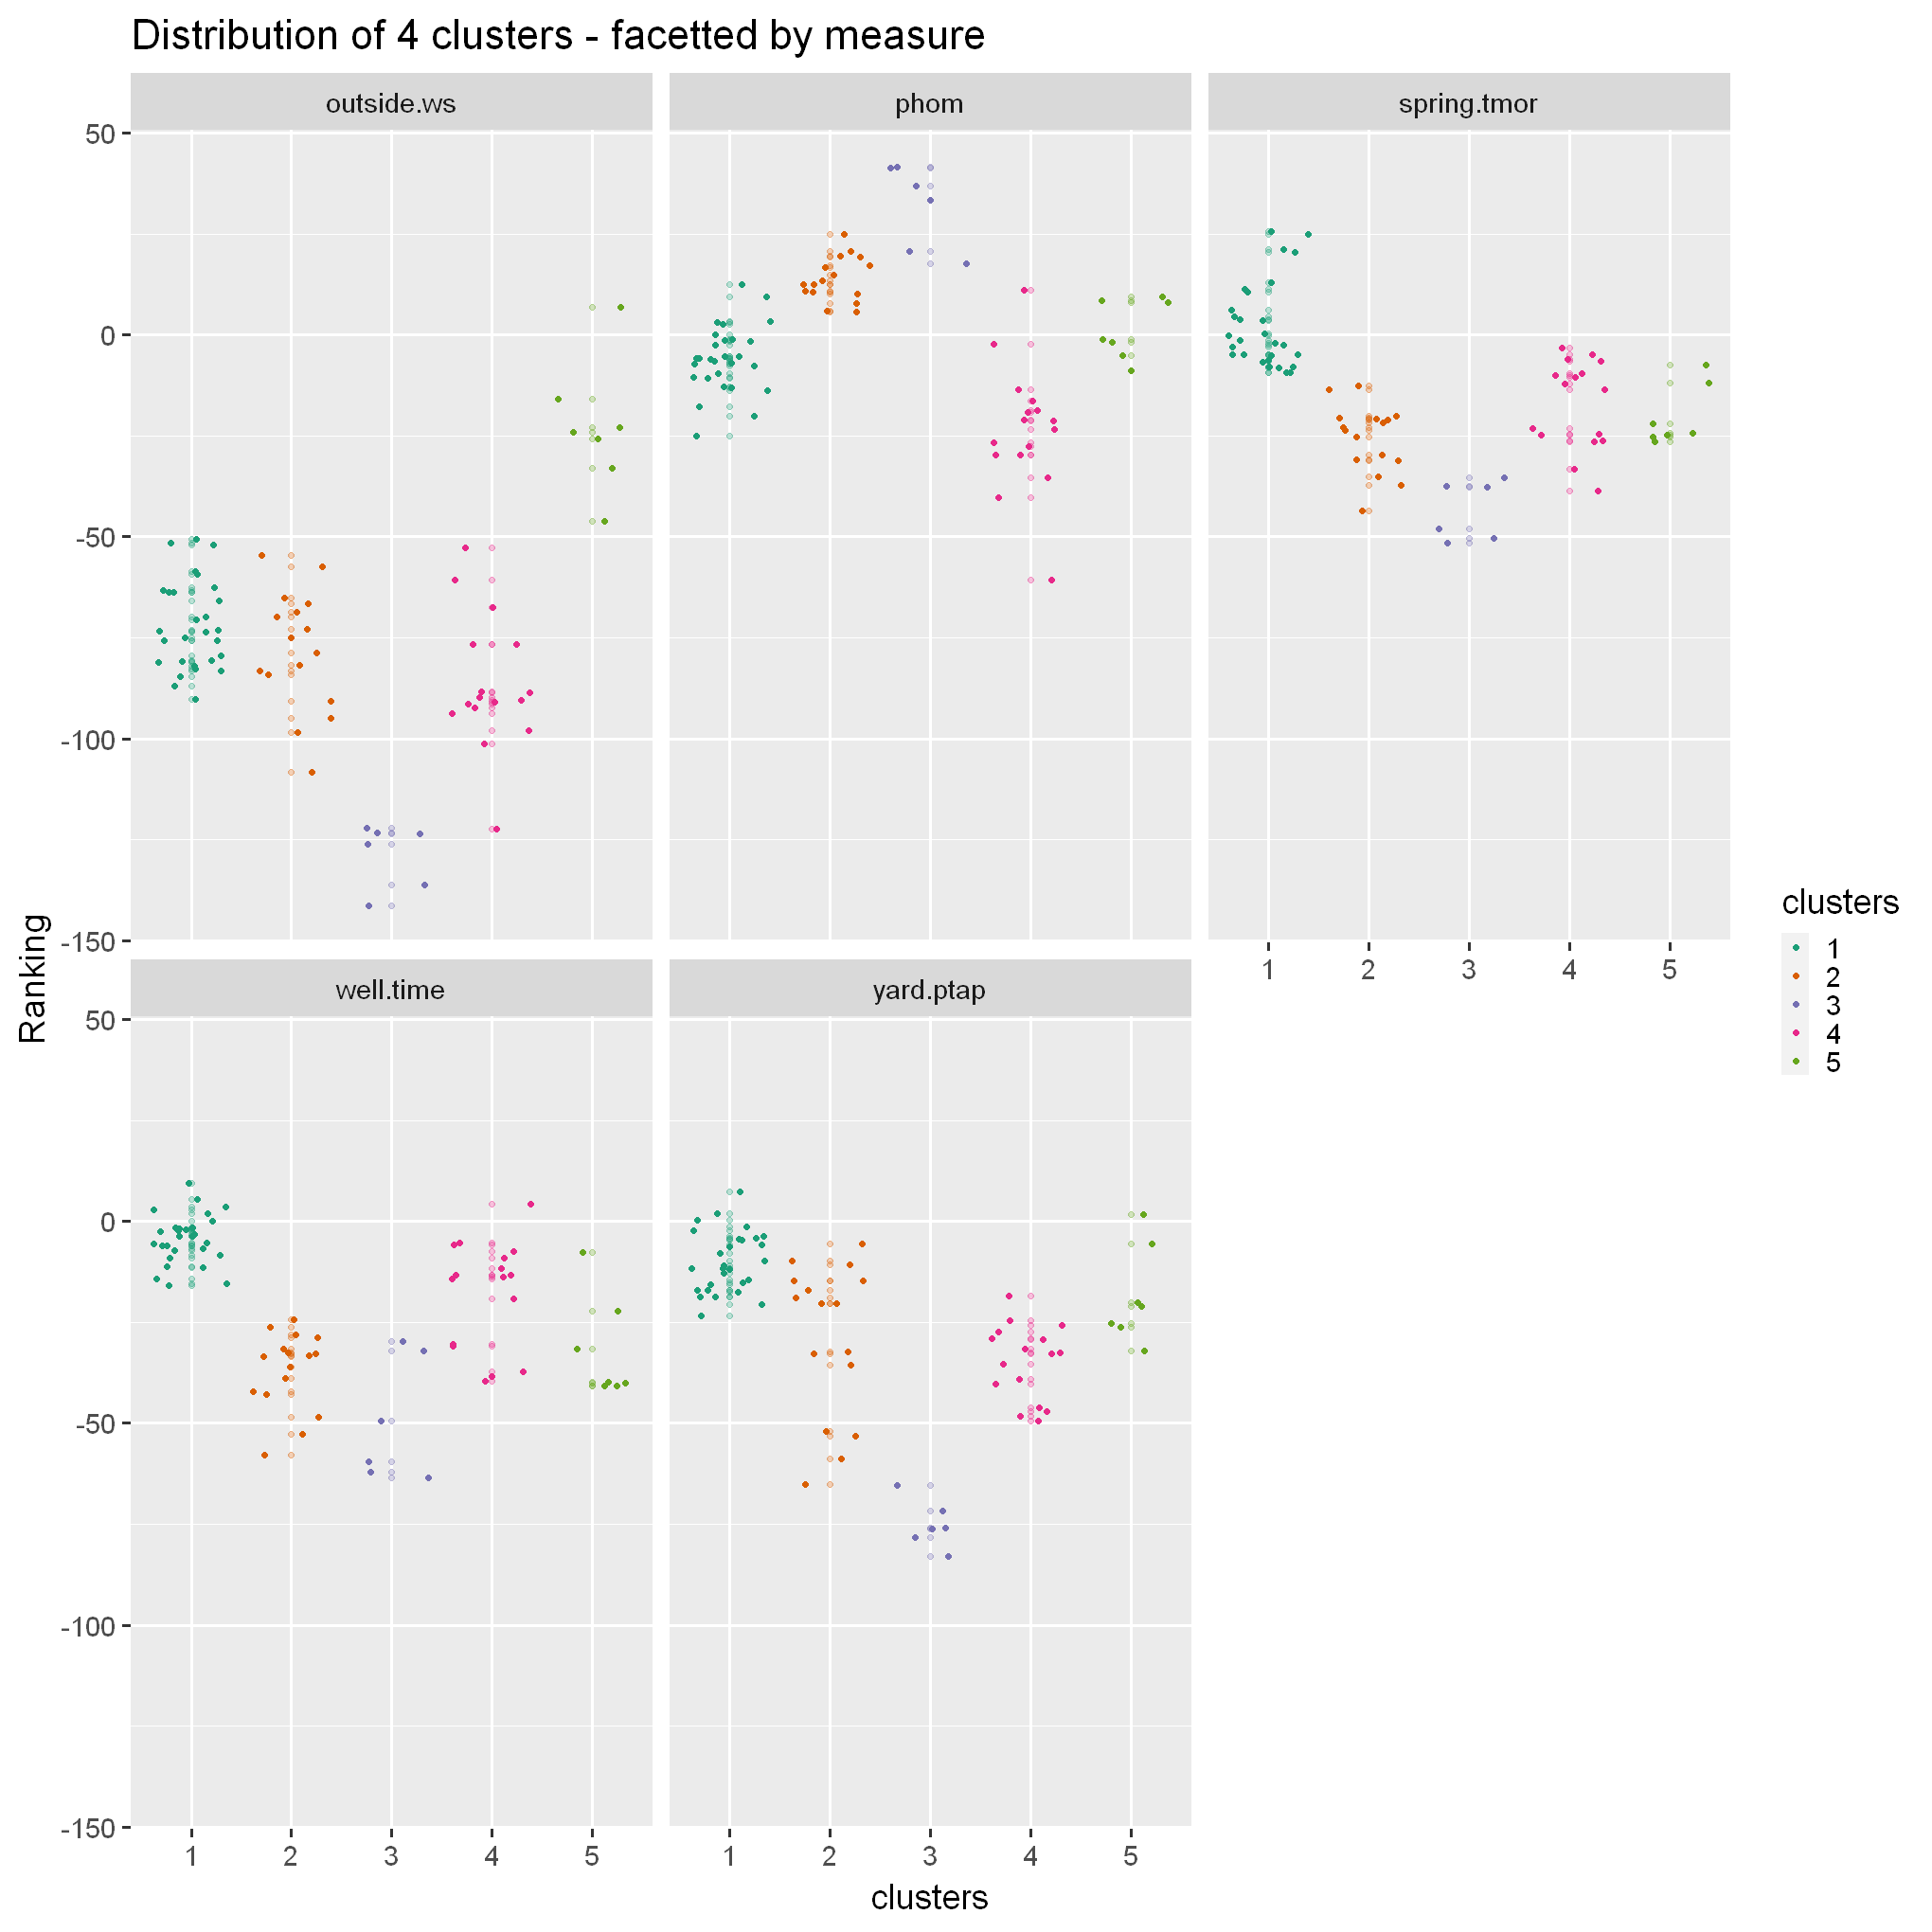

In [89]:
#data_wa$cluster <- cutree(hc.ward2,4) 
df
hc.ward2=hclust(dist(df), method ="ward.D2")
df$clusters <- cutree(hc.ward2,5)
df$clusters <- as.factor(df$clusters)

p <- ggplot(df, aes(clusters, well.time, color = clusters, fill = clusters)) +
  geom_point(alpha = 0.6) +
  geom_jitter() +
  geom_point() +
  ggtitle("Distribution of clusters by NARS Lab") +
  scale_color_manual(values=c("#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A", "#66A61E") )
p <- p + theme_grey(base_size = 22) 
p

table(df$clusters)

#Group by the cluster assignment and calculate averages
df4_clus_avg <- df %>%
  group_by(clusters) %>%
  summarize_if(is.numeric, mean, na.rm=TRUE)


head(df4_clus_avg,7) 

sapply(df4_clus_avg, class)
#Create a parallel coordinate plot of the values:
ggparcoord <- ggparcoord(df4_clus_avg, columns = c(2:6), 
           groupColumn = "clusters", scale = "globalminmax", order = "skewness") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) + geom_point(color = "#00AFBB") 
    
#make a dot plot
countries4_gathered <- df %>% gather(Measure, Ranking, well.time:outside.ws) 

g <- ggplot(countries4_gathered, aes(Measure, Ranking, color = clusters )) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of clusters per measure - 4 clusters") 
   
g <- g + theme_grey(base_size = 22) +  scale_color_manual(values=c("#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A", "#66A61E")) 
g 
countries4_gathered %>% 

ggplot(aes(clusters, Ranking, col = clusters)) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of 4 clusters - facetted by measure") +
  facet_wrap(~Measure) +
 theme_grey(base_size = 22) +  
scale_color_manual(values=c("#1B9E77" , "#D95F02" ,"#7570B3" ,"#E7298A", "#66A61E"))
# set the set factor as for the clusters


# Ranking

In [90]:
df.wa <- read_excel("../../results/df-wa-fa.xlsx",sheet=1)
df.wa <- df.wa %>% 
  rename(
    well.time = PA1,
    spring.tmor = PA3,
    phom = PA2,
    yard.ptap = PA4,
    outside.ws = PA5
      
    )

In [91]:
head(df.wa,7) # clean df at next save (2 cluster columns - only 1 needed; etc) #df also needs to be only water accessibility variables

Country,well.time,spring.tmor,phom,yard.ptap,outside.ws
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,-6.704758,-2.984986,-12.85618,-11.886626,-59.27068
Albania,-42.888074,-30.984337,20.82525,-53.165726,-94.86436
Angola,-2.512602,3.686798,2.72616,-4.392143,-52.01720
Armenia,-63.607862,-51.504509,41.32225,-78.394369,-136.31722
Azerbaijan,-35.994685,-25.322488,10.25590,-32.187582,-81.70158
Bangladesh,-38.401709,-38.626072,-60.62093,-48.329163,-90.90471
Benin,-6.113861,-7.871829,-17.71719,-18.806414,-75.00816


In [92]:
df.wa["norm"] <- apply(df.wa[2:6], 1, function(x) sqrt(sum(x^2)) ) #assuming columns 5:10 are the water accessibility variables
# Ideally, df should just be the countries and the water access. variables ONLY. This, way, the code should then be:
# df["norm"] <- apply(df, 1, function(x) sqrt(sum(x^2)) )

In [93]:
df.wa["distToCentroid"] = 0 # initialize

In [103]:
df.wa$clusters <- as.numeric(df$clusters)
head(df.wa)
#Turn into numeric to find centroids

Country,well.time,spring.tmor,phom,yard.ptap,outside.ws,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,-6.704758,-2.984986,-12.85618,-11.886626,-59.27068,62.23705,0,1
Albania,-42.888074,-30.984337,20.82525,-53.165726,-94.86436,122.71491,0,2
Angola,-2.512602,3.686798,2.72616,-4.392143,-52.01720,52.46349,0,1
Armenia,-63.607862,-51.504509,41.32225,-78.394369,-136.31722,182.02820,0,3
Azerbaijan,-35.994685,-25.322488,10.25590,-32.187582,-81.70158,98.75838,0,2
Bangladesh,-38.401709,-38.626072,-60.62093,-48.329163,-90.90471,131.30475,0,4


In [104]:
head(df.wa)

Country,well.time,spring.tmor,phom,yard.ptap,outside.ws,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,-6.704758,-2.984986,-12.85618,-11.886626,-59.27068,62.23705,0,1
Albania,-42.888074,-30.984337,20.82525,-53.165726,-94.86436,122.71491,0,2
Angola,-2.512602,3.686798,2.72616,-4.392143,-52.01720,52.46349,0,1
Armenia,-63.607862,-51.504509,41.32225,-78.394369,-136.31722,182.02820,0,3
Azerbaijan,-35.994685,-25.322488,10.25590,-32.187582,-81.70158,98.75838,0,2
Bangladesh,-38.401709,-38.626072,-60.62093,-48.329163,-90.90471,131.30475,0,4


clusters,well.time,spring.tmor,phom,yard.ptap,outside.ws
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-4.335078,2.193795,-5.899745,-9.913764,-71.78450
2,-36.873773,-25.618786,13.952056,-28.873672,-78.14998
3,-49.401285,-43.385979,32.000880,-75.083253,-128.76794
4,-17.841501,-17.081094,-23.376056,-34.815094,-86.32754
5,-31.817231,-20.288259,1.332664,-18.314523,-22.96776


In [111]:
# assuming centroiddf.wa is your vector of cluster centroids

# copied this from your earlier notebook
df.wa.aggregate <- aggregate(df.wa[,c(2:6)], list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,c(1:6)]
centroiddf.wa <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster

head(centroiddf.wa)       
                       
                       
df.wa$clusters <- dfsimple$clusters                      
head(df.wa,7)
                       df <- df.wa

[1]  72.87462  95.68577 166.05591  99.18195  48.10057

Country,well.time,spring.tmor,phom,yard.ptap,outside.ws,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,-6.704758,-2.984986,-12.85618,-11.886626,-59.27068,62.23705,0,1
Albania,-42.888074,-30.984337,20.82525,-53.165726,-94.86436,122.71491,0,2
Angola,-2.512602,3.686798,2.72616,-4.392143,-52.01720,52.46349,0,1
Armenia,-63.607862,-51.504509,41.32225,-78.394369,-136.31722,182.02820,0,3
Azerbaijan,-35.994685,-25.322488,10.25590,-32.187582,-81.70158,98.75838,0,2
Bangladesh,-38.401709,-38.626072,-60.62093,-48.329163,-90.90471,131.30475,0,4
Benin,-6.113861,-7.871829,-17.71719,-18.806414,-75.00816,79.95717,0,1


In [112]:
# Then here, you compute the distance to centroid cluster by cluster
df[df$clusters == 1, "distToCentroid"] = abs(df[df$clusters == 1, "norm"] - centroiddf.wa[1])
df[df$clusters == 2, "distToCentroid"] = abs(df[df$clusters == 2, "norm"] - centroiddf.wa[2])
df[df$clusters == 3, "distToCentroid"] = abs(df[df$clusters == 3, "norm"] - centroiddf.wa[3])
df[df$clusters == 4, "distToCentroid"] = abs(df[df$clusters == 4, "norm"] - centroiddf.wa[4])
df[df$clusters == 5, "distToCentroid"] = abs(df[df$clusters == 5, "norm"] - centroiddf.wa[4])
                       

head(df)
write_xlsx(df , '../../results/df-fa-cluster-rank.xlsx')

Country,well.time,spring.tmor,phom,yard.ptap,outside.ws,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,-6.704758,-2.984986,-12.85618,-11.886626,-59.27068,62.23705,10.637567,1
Albania,-42.888074,-30.984337,20.82525,-53.165726,-94.86436,122.71491,27.029143,2
Angola,-2.512602,3.686798,2.72616,-4.392143,-52.01720,52.46349,20.411128,1
Armenia,-63.607862,-51.504509,41.32225,-78.394369,-136.31722,182.02820,15.972293,3
Azerbaijan,-35.994685,-25.322488,10.25590,-32.187582,-81.70158,98.75838,3.072611,2
Bangladesh,-38.401709,-38.626072,-60.62093,-48.329163,-90.90471,131.30475,32.122801,4


In [115]:
# You can then sort each subset by the size of "distToCentroid"
df %>% 
  arrange_at("Country", desc) %>%
  arrange_at("distToCentroid") %>%
  select(1, 8, 9)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Congo,0.7565630,1
Colombia,0.9132131,3
Chad,1.1974827,4
Zimbabwe,1.5257465,4
Gabon,2.3323559,2
Sierra Leone,2.3762344,1
Guinea,2.3958037,4
Congo Democratic Republic,2.4061530,1
Ethiopia,3.0548572,1


In [116]:
# You can then sort each subset by the size of "distToCentroid"
df1 = df %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1, 8, 9)


In [117]:
head(df1)
cluster.one <- subset(df1, clusters == 1 )
cluster.two <- subset(df1, clusters == 2 )
cluster.three <- subset(df1, clusters == 3 )
cluster.four <- subset(df1, clusters == 4 )
cluster.five <- subset(df1, clusters == 5 )
head(cluster.one)
summary(cluster.one)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Congo,0.756563,1
Sierra Leone,2.376234,1
Congo Democratic Republic,2.406153,1
Ethiopia,3.054857,1
Rwanda,3.296955,1
Kenya,4.029286,1


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Congo,0.756563,1
Sierra Leone,2.376234,1
Congo Democratic Republic,2.406153,1
Ethiopia,3.054857,1
Rwanda,3.296955,1
Kenya,4.029286,1


   Country          distToCentroid       clusters
 Length:28          Min.   : 0.7566   Min.   :1  
 Class :character   1st Qu.: 5.3850   1st Qu.:1  
 Mode  :character   Median : 9.6124   Median :1  
                    Mean   :10.0457   Mean   :1  
                    3rd Qu.:13.8341   3rd Qu.:1  
                    Max.   :21.8530   Max.   :1  

In [118]:
cluster.one %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.two %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.three %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.four %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
   arrange_at("clusters") %>%
 select(1:3)
cluster.five %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
   arrange_at("clusters") %>%
 select(1:3)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Congo,0.756563,1
Sierra Leone,2.376234,1
Congo Democratic Republic,2.406153,1
Ethiopia,3.054857,1
Rwanda,3.296955,1
Kenya,4.029286,1
Mauritania,5.141067,1
Eritrea,5.466350,1
Haiti,5.912311,1


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Gabon,2.332356,2
Azerbaijan,3.072611,2
Kyrgyz Republic,5.866218,2
Tajikistan,7.872597,2
Bolivia,9.654594,2
Nicaragua,11.639222,2
Honduras,13.383539,2
Senegal,18.429852,2
Timor-Leste,20.481334,2


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Colombia,0.9132131,3
Peru,9.5050101,3
Ukraine,9.7140152,3
Morocco,14.7594468,3
Armenia,15.9722933,3
Egypt,21.0658038,3


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Chad,1.197483,4
Zimbabwe,1.525747,4
Guinea,2.395804,4
Moldova,3.224242,4
Cameroon,4.177233,4
Uganda,4.672653,4
India,7.305723,4
Nepal,8.586441,4
Liberia,9.158948,4


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Guatemala,28.70224,5
Guyana,37.35297,5
Maldives,39.94906,5
Dominican Republic,40.21003,5
Indonesia,45.43428,5
Vietnam,72.29834,5
Yemen,72.59261,5


# World Map

In [123]:
df = read_excel('../../results/df-fa-cluster-rank.xlsx') #change name of file to sth descriptive (e.g. country-clusters)
head(df)

Country,well.time,spring.tmor,phom,yard.ptap,outside.ws,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,-6.704758,-2.984986,-12.85618,-11.886626,-59.27068,62.23705,10.637567,1
Albania,-42.888074,-30.984337,20.82525,-53.165726,-94.86436,122.71491,27.029143,2
Angola,-2.512602,3.686798,2.72616,-4.392143,-52.01720,52.46349,20.411128,1
Armenia,-63.607862,-51.504509,41.32225,-78.394369,-136.31722,182.02820,15.972293,3
Azerbaijan,-35.994685,-25.322488,10.25590,-32.187582,-81.70158,98.75838,3.072611,2
Bangladesh,-38.401709,-38.626072,-60.62093,-48.329163,-90.90471,131.30475,32.122801,4


In [124]:
df = df[, c(1,9)] # select only country name and cluster number
head(df,7)

Country,clusters
<chr>,<dbl>
Afghanistan,1
Albania,2
Angola,1
Armenia,3
Azerbaijan,2
Bangladesh,4
Benin,1


In [125]:
colnames(df) = c('region', 'value') # change column names for ggplot
dim(df)
head(df)

[1] 73  2

region,value
<chr>,<dbl>
Afghanistan,1
Albania,2
Angola,1
Armenia,3
Azerbaijan,2
Bangladesh,4


In [126]:
# This is to convert country names in df to match those in the worldMap dataframe
coords <- joinCountryData2Map(df, joinCode = "NAME", nameJoinColumn = "region")
coords = data.frame(coords)
colnames(coords) = tolower(colnames(coords))
colnames(coords)
coords = drop_na(coords, value)
coords$name

71 codes from your data successfully matched countries in the map
2 codes from your data failed to match with a country code in the map
172 codes from the map weren't represented in your data


[1] "scalerank"    "labelrank"    "featurecla"   "sovereignt"   "sov_a3"      
 [6] "adm0_dif"     "level"        "type"         "admin"        "adm0_a3"     
[11] "geou_dif"     "geounit"      "gu_a3"        "su_dif"       "subunit"     
[16] "su_a3"        "name"         "abbrev"       "postal"       "name_forma"  
[21] "terr_"        "name_sort"    "map_color"    "pop_est"      "gdp_md_est"  
[26] "fips_10_"     "iso_a2"       "iso_a3"       "iso_n3"       "iso3"        
[31] "lon"          "lat"          "iso3.1"       "admin.1"      "region"      
[36] "continent"    "geo3major"    "geo3"         "image24"      "glocaf"      
[41] "stern"        "sresmajor"    "sres"         "gbd"          "avoidnumeric"
[46] "avoidname"    "ldc"          "sid"          "lldc"         "region"      
[51] "value"        "admin.2"      "iso3.2"

[1] Afghanistan           Angola                Albania              
 [4] Armenia               Azerbaijan            Burundi              
 [7] Benin                 Burkina Faso          Bangladesh           
[10] Bolivia               Ivory Coast           Cameroon             
[13] Congo (Brazzaville)   Colombia              Dominican Rep.       
[16] Egypt                 Eritrea               Ethiopia             
[19] Gabon                 Ghana                 Guinea               
[22] Gambia                Guatemala             Guyana               
[25] Honduras              Haiti                 Indonesia            
[28] India                 Jordan                Kenya                
[31] Kyrgyzstan            Cambodia              Liberia              
[34] Lesotho               Morocco               Moldova              
[37] Madagascar            Mali                  Myanmar              
[40] Mozambique            Mauritania            Malawi               
[43] Namibia               Niger                 Nigeria              
[46] Nicaragua             Nepal                 Pakistan             
[49] Peru                  Philippines           Papua New Guinea     
[52] Rwanda                Senegal               Sierra Leone         
[55] Chad                  Togo                  Tajikistan           
[58] Turkmenistan          East Timor            Turkey               
[61] Tanzania              Uganda                Ukraine              
[64] Vietnam               Yemen                 South Africa         
[67] Zambia                Zimbabwe              Comoros              
[70] Maldives              Sao Tome and Principe
243 Levels: Afghanistan Aland Albania Algeria American Samoa Andorra ... Zimbabwe

In [127]:
setdiff(df$region,coords$name)

[1] "Congo"                     "Congo Democratic Republic"
[3] "Cote d'Ivoire"             "Dominican Republic"       
[5] "Eswatini"                  "Kyrgyz Republic"          
[7] "Timor-Leste"

In [128]:
# Correct the country names in DF
df[df=='Timor-Leste'] = "East Timor"
df[df=='Central African Republic'] = "Central African Rep."
df[df=='Cote d\'Ivoire'] = "Ivory Coast"
df[df=='Dominican Republic'] = "Dominican Rep."
df[df=='Kyrgyz Republic'] = "Kyrgyzstan"
df[df=='Eswatini'] = "Swaziland"
df[df=='Congo'] = "Congo (Brazzaville)"
df[df=='Congo Democratic Republic'] = "Congo (Kinshasa)"

In [129]:
# Get world map data (lat/long)
countrynames = df$region
worldMap <- getMap()
country_indices <- which(worldMap$NAME%in%countrynames)

In [130]:
# Get coordinates for all countries to plot base map
allCoords <- lapply(seq(1,243), function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})
allCoords <- do.call("rbind", allCoords)


In [131]:
# Get coordinates strictly for those in water accessibility dataset
waterCoords <- lapply(country_indices, function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})

waterCoords <- do.call("rbind", waterCoords)
waterCoords$value <- df$value[match(waterCoords$region,df$region)]
waterCoords$value <- factor(waterCoords$value)

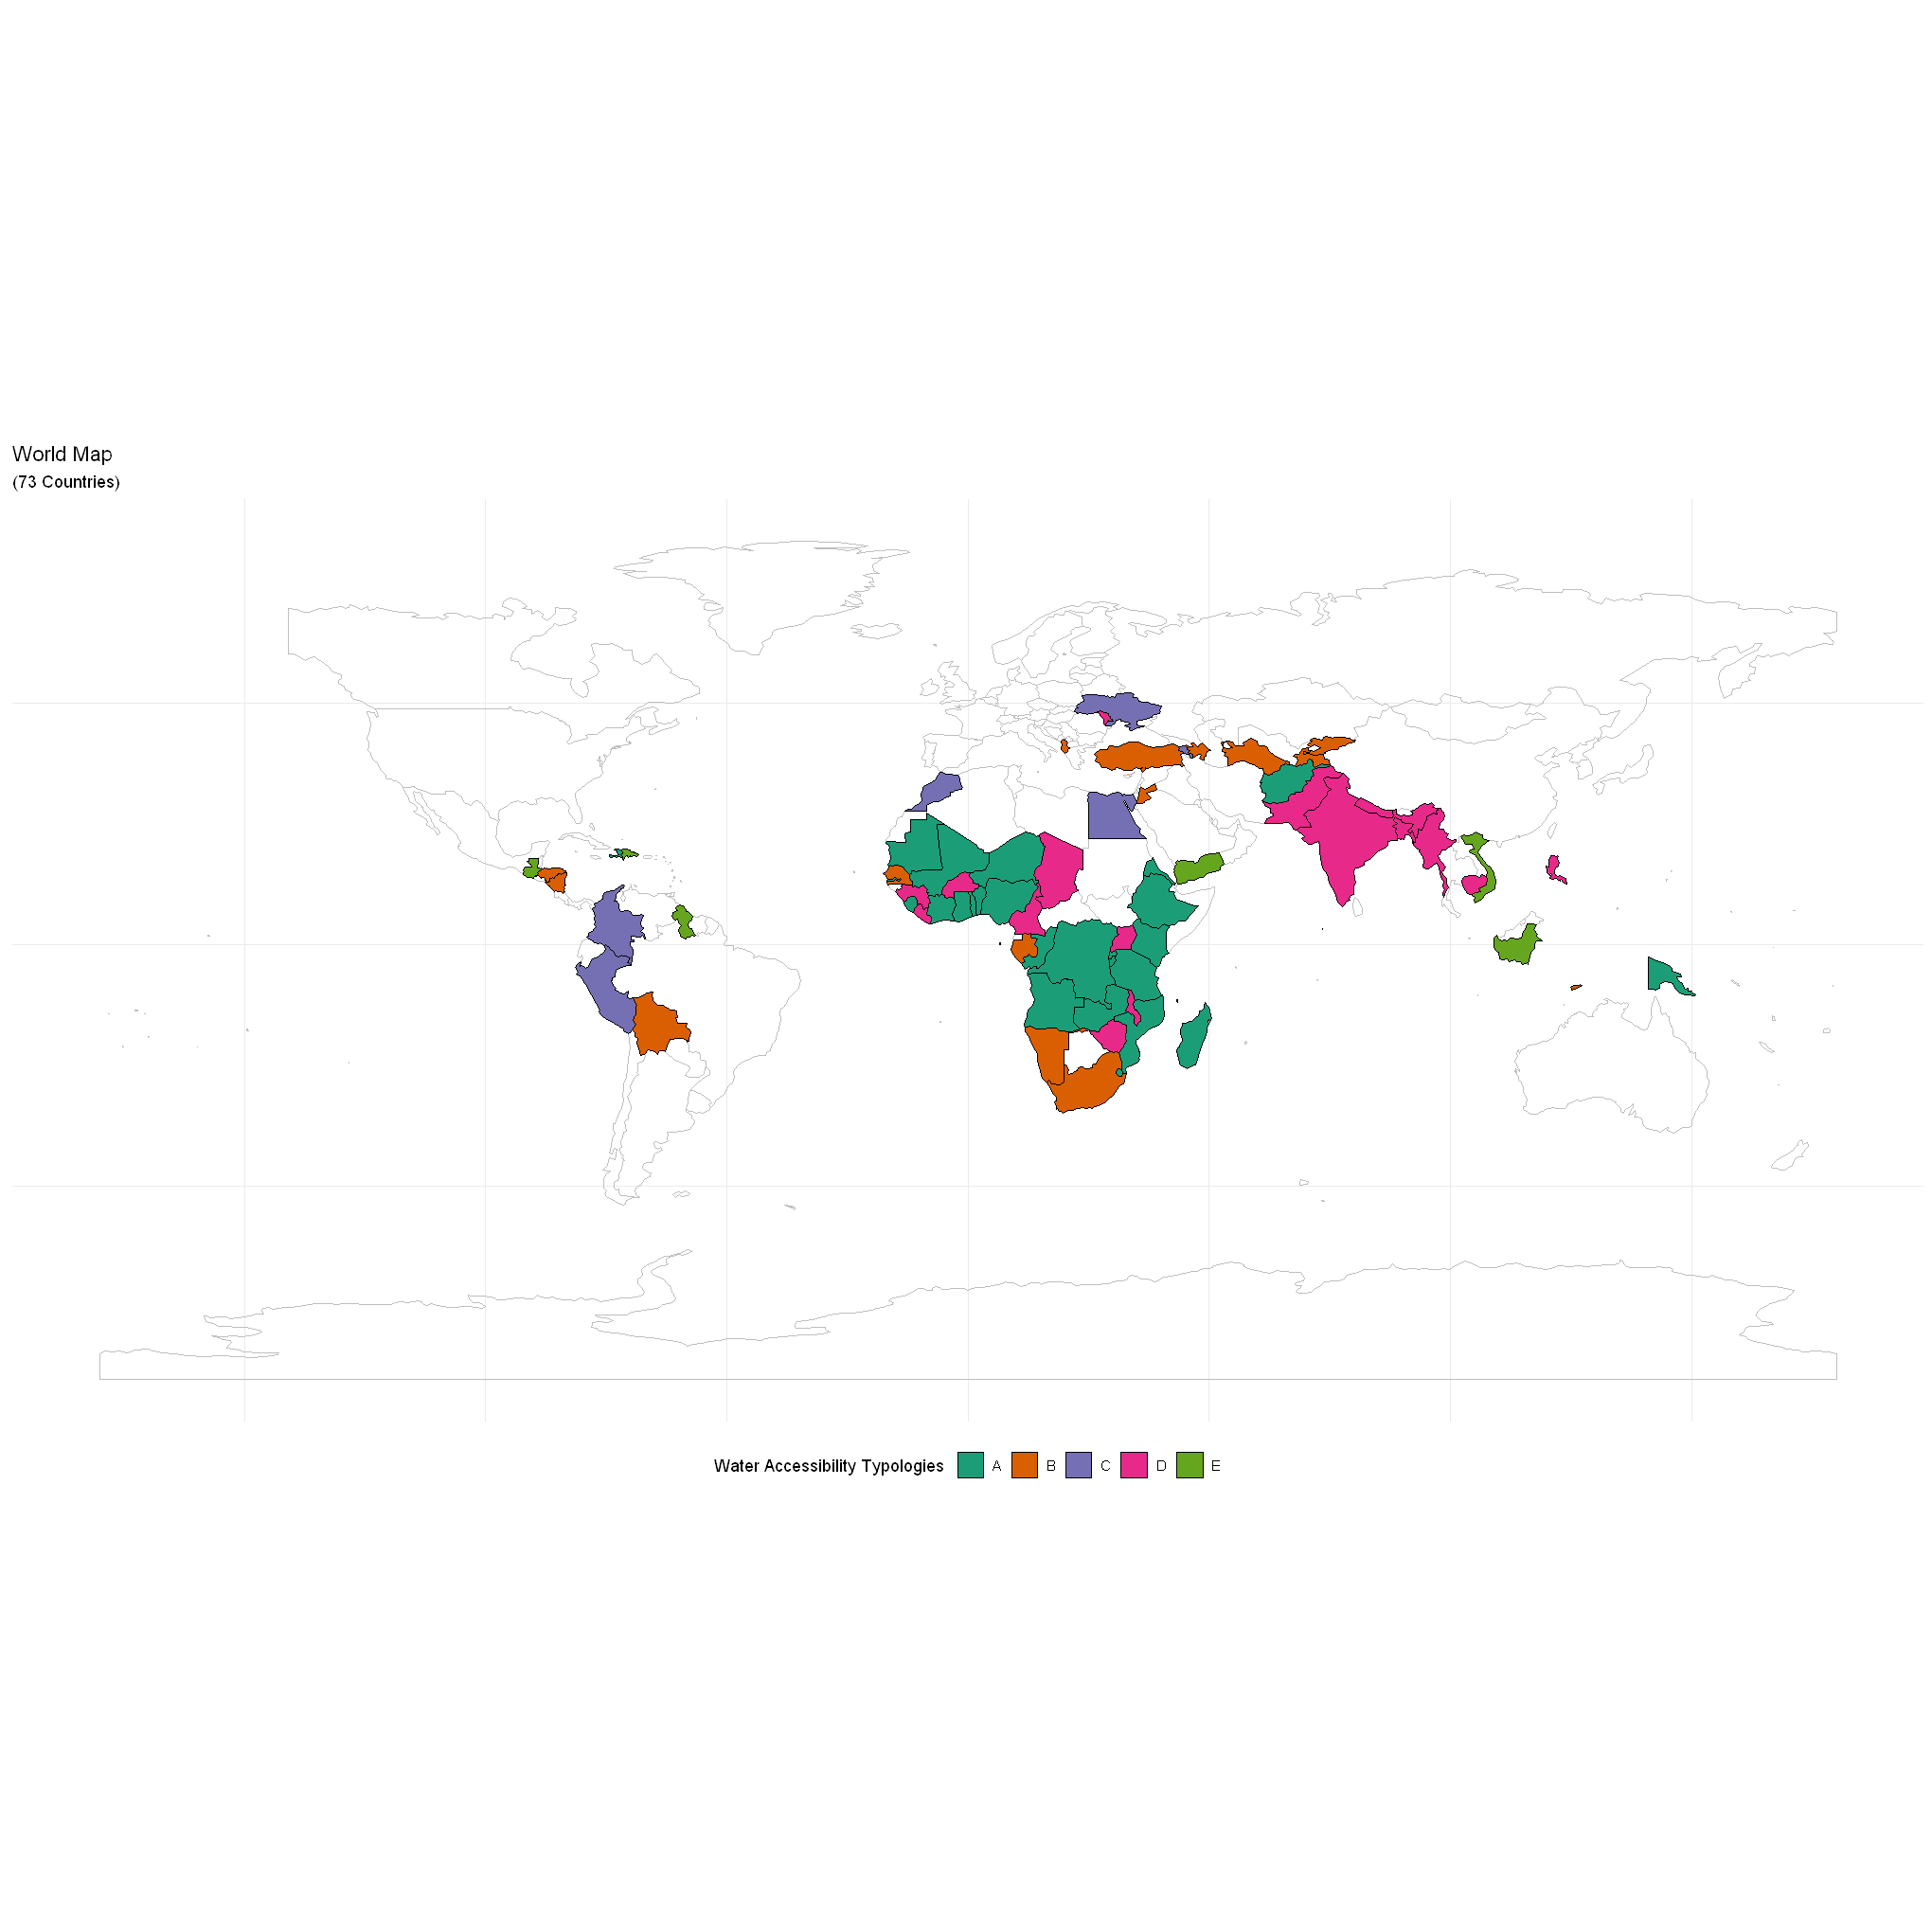

In [132]:
# Plot
options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1)
ggplot() +
    geom_sf(color = "black", fill= 'antiquewhite') +
    xlab("Longitude") + ylab("Latitude") +
    geom_polygon(data= allCoords, mapping = aes(x =long, y=lat,group = region),color="grey",fill=NA) + 
    geom_polygon( data = waterCoords, mapping = aes(x =long, y=lat,group = region, fill=value), size=.3,color="black") +
    expand_limits(x = waterCoords$long, y = waterCoords$lat)  + 
    scale_fill_brewer(palette='Dark2', name="Water Accessibility Typologies", na.value="grey", labels = c("A", "B", "C","D","E")) +  #labels = c())+
    ggtitle("World Map", subtitle = paste0("(", length(unique(df$region)), " Countries)")) +
    theme_minimal() +
    theme(legend.position = "bottom",
        axis.ticks = element_blank(), 
        axis.title = element_blank(), 
        axis.text =  element_blank()) 
#     #guides(fill = guide_colorbar(barwidth = 10, barheight = .5))
